<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

# 1. Import libraries, classes, custom functions, and data load</h1>

In [2]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadJSON

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)


In [3]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
business, reviews, users = LoadJSON()

utils.YelpDatasets(business_df = business, reviews_df = reviews, users_df = users)

Business DataFrame's head:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."



Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15



Users DataFrame's head:


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


# 2. EDA - Exploratory Data Analysis</h1>

In [4]:
# Aggregation of data, with relevant columns, from the business and reviews datasets
cities = business[['business_id', 'city', 'review_count', 'is_open']]
reviews_small = reviews[['review_id', 'business_id', 'stars']]

cities_reviews = pd.merge(reviews_small, cities, left_on='business_id', right_on='business_id', how='left')
cities_reviews = cities_reviews[cities_reviews['is_open'] == 1].reset_index().drop(columns=['index'])
cities_reviews

,review_id,business_id,stars,city,review_count,is_open
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,North Wales,169,1
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Tucson,47,1
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,Philadelphia,181,1
3,6AxgBCNX_PNTOxmbRSwcKQ,gmjsEdUsKpj9Xxu6pdjH0g,5,New Orleans,359,1
4,ZKvDG2sBvHVdF5oBNUOpAQ,B5XSoSG3SfvQGtKEGQ1tSQ,3,Santa Barbara,13,1
...,...,...,...,...,...,...
5791229,H0RIamZu0B0Ei0P4aeh3sQ,jals67o91gcrD4DC81Vk6w,5,Boise,36,1
5791230,shTPgbgdwTHSuU67mGCmZQ,2vLksaMmSEcGbjI5gywpZA,5,Wimauma,30,1
5791231,YNfNhgZlaaCO5Q_YJR4rEw,R1khUUxidqfaJmcpmGd4aw,4,Willow Grove,32,1
5791232,i-I4ZOhoX70Nw5H0FwrQUA,Rr9kKArrMhSLVE9a53q-aA,5,Indianapolis,83,1


In [4]:
n_cities = cities_reviews['city'].nunique()
print(f'Number of cities that have at least one restaurant open: {n_cities} (total is 1416 cities).')

Number of cities that have at least one restaurant open: 1320 (total is 1416 cities).


##   2.1 EDA for each table</h1>

###        2.1.1 EDA for the table BUSINESS</h2>

            latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        ------

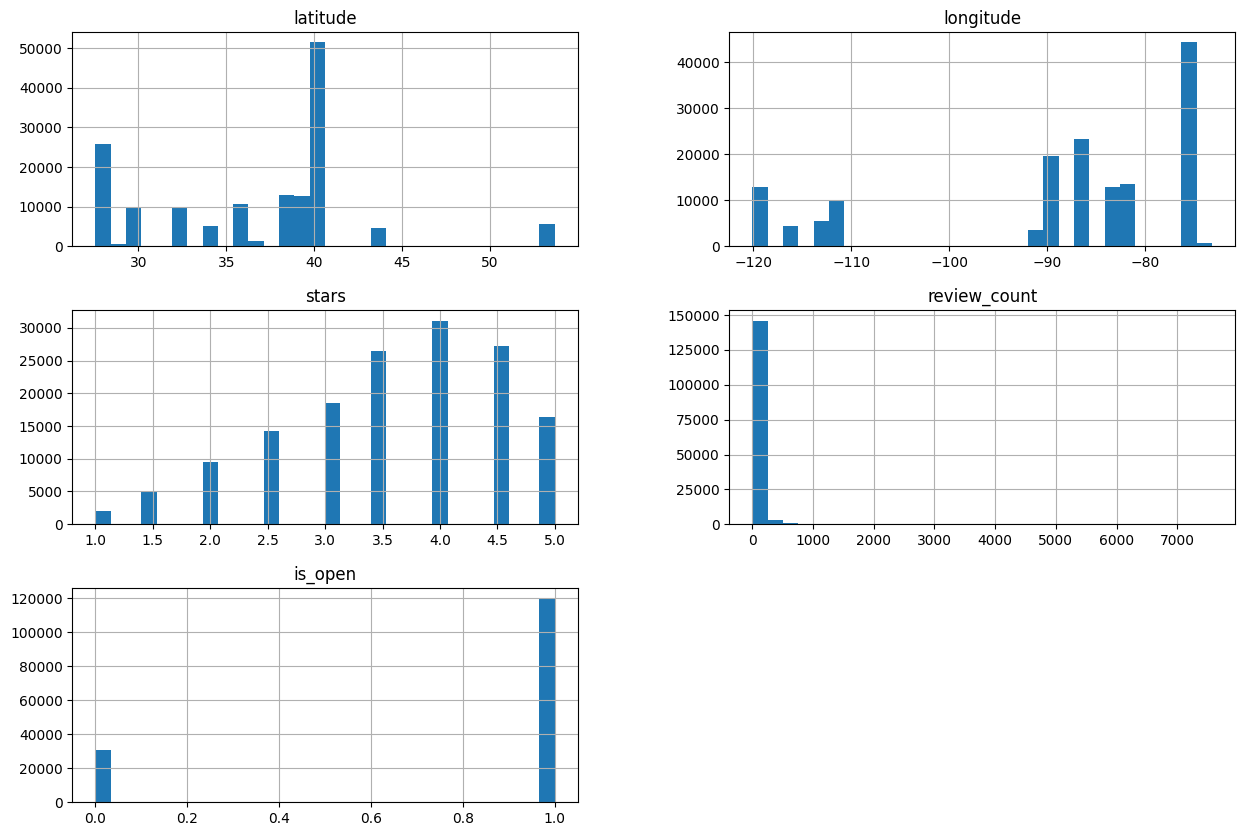

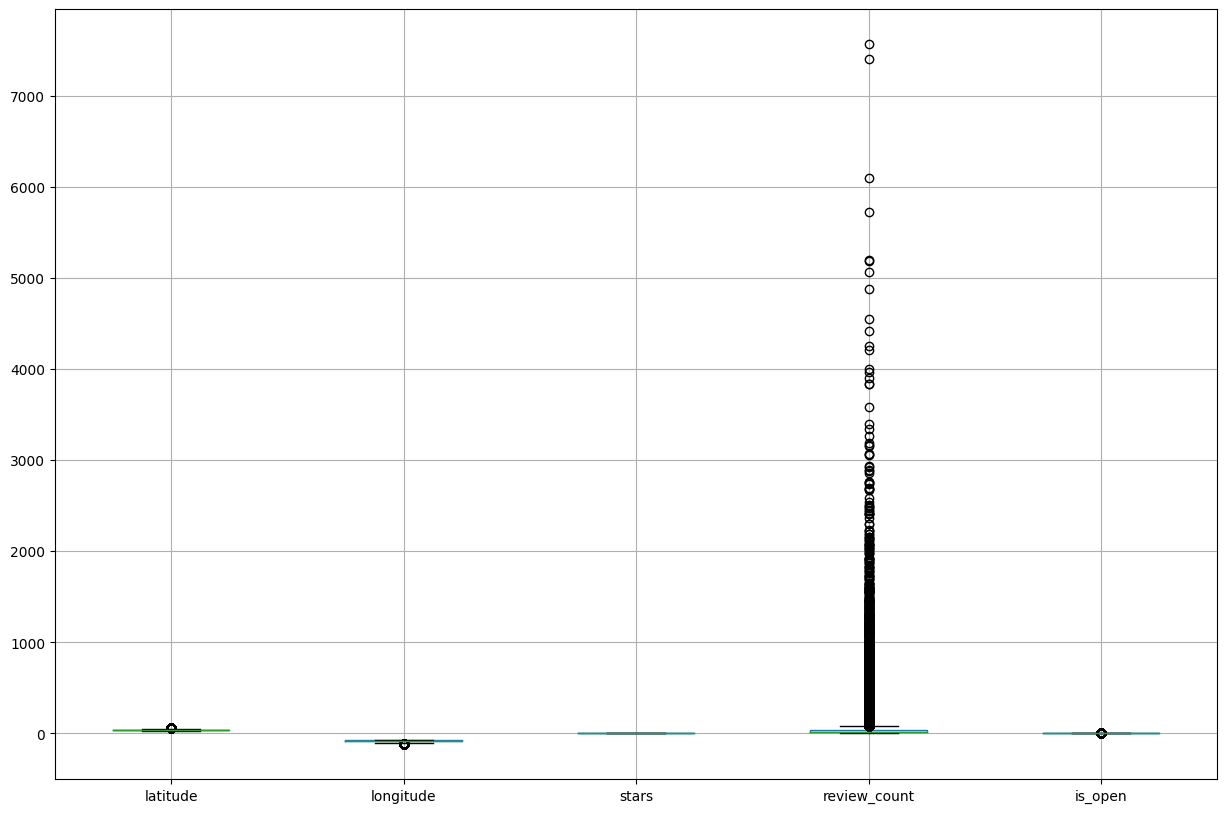

In [5]:
# Statistical summary of numerical columns
print(business.describe())

# Information about the DataFrame
print(business.info())

# Checking for missing values
print(business.isnull().sum())
missing_data = business.isnull().sum()
print("Missing values:\n", missing_data)

# Histograms for numerical columns
business.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots for numerical columns
business.boxplot(figsize=(15, 10))
plt.show()


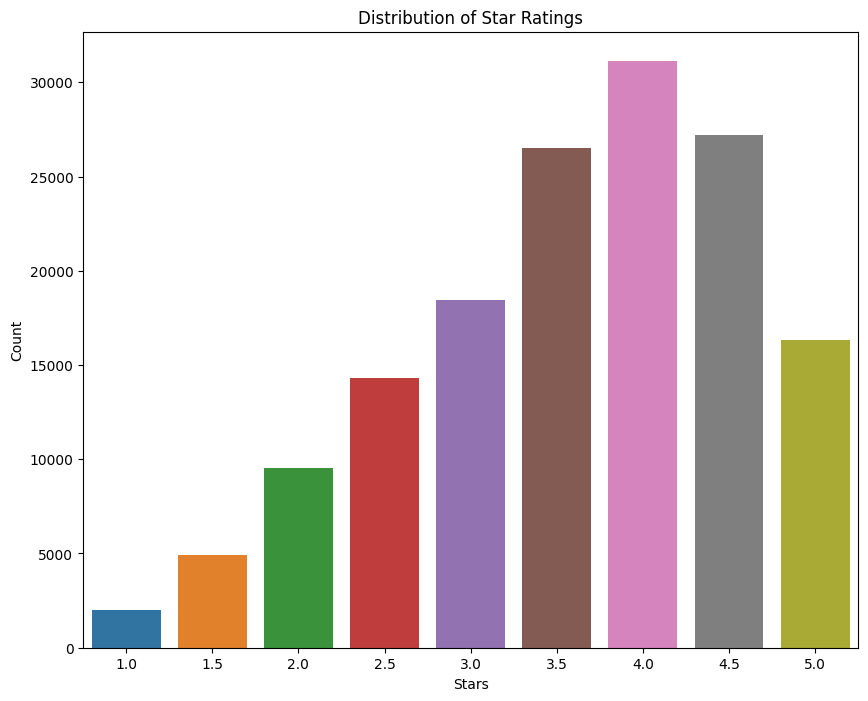

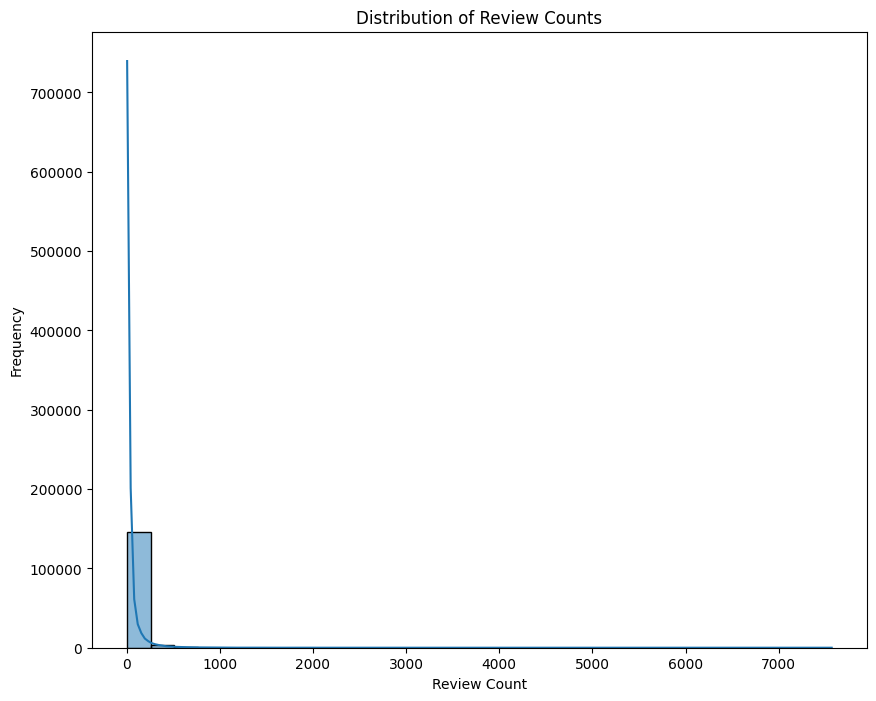

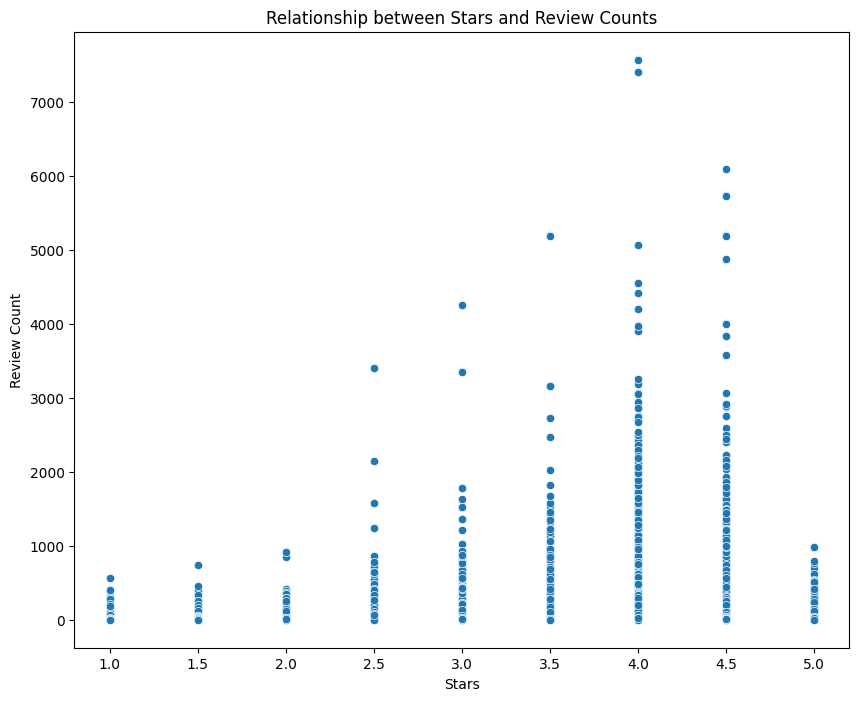

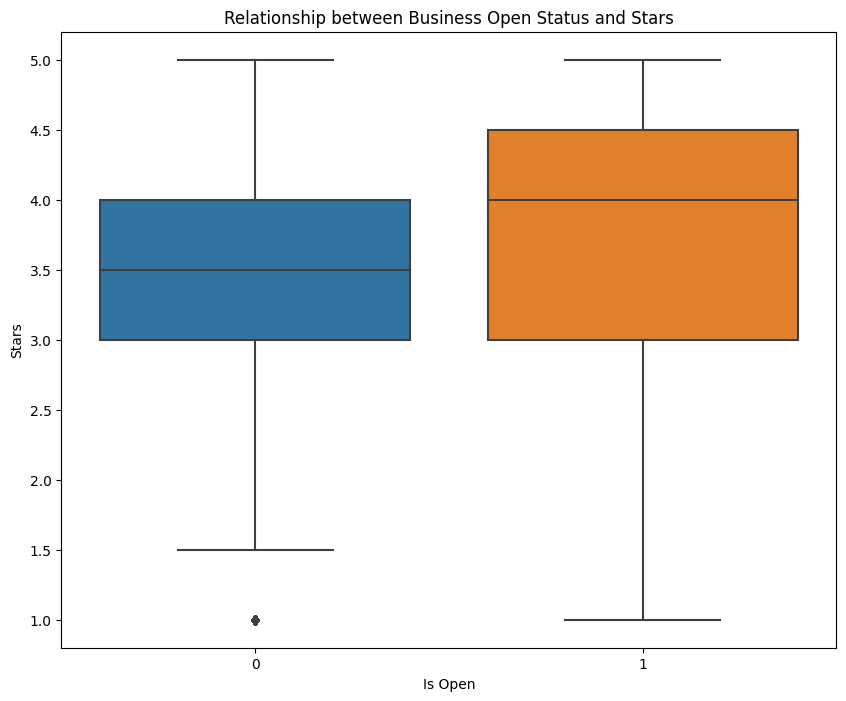

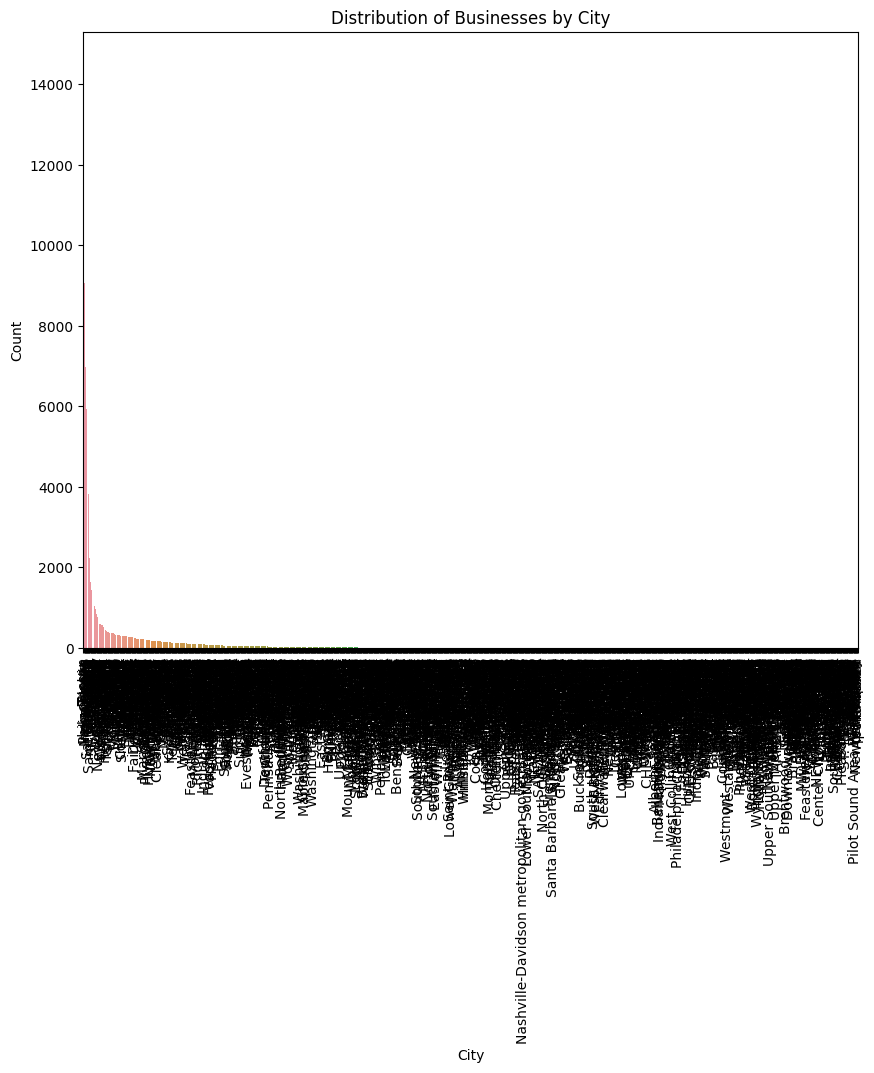

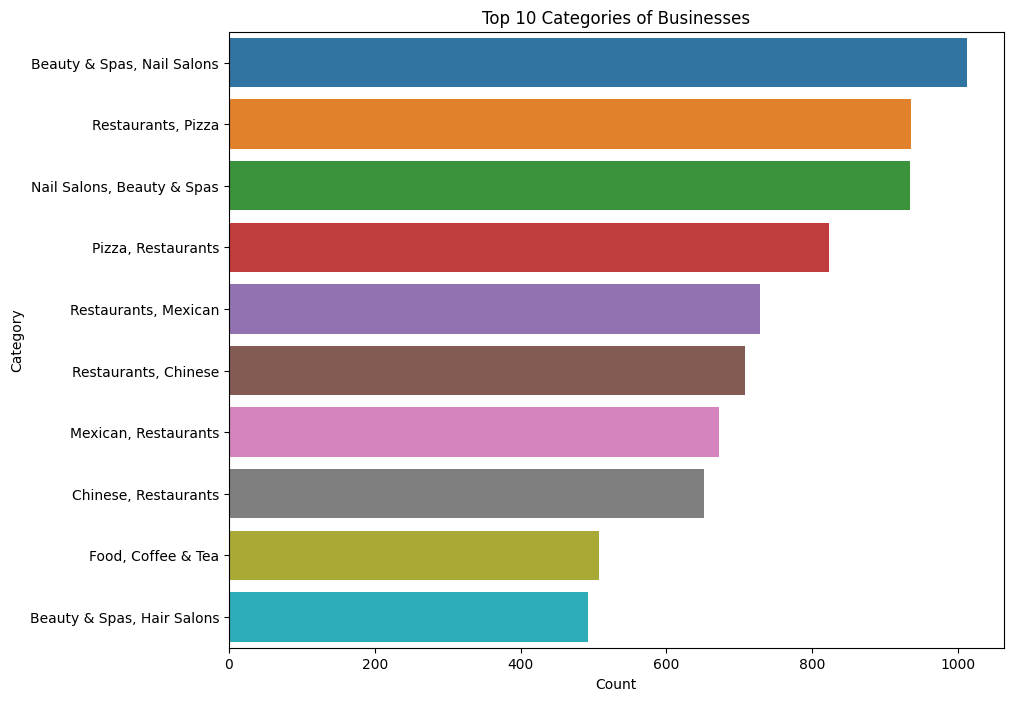

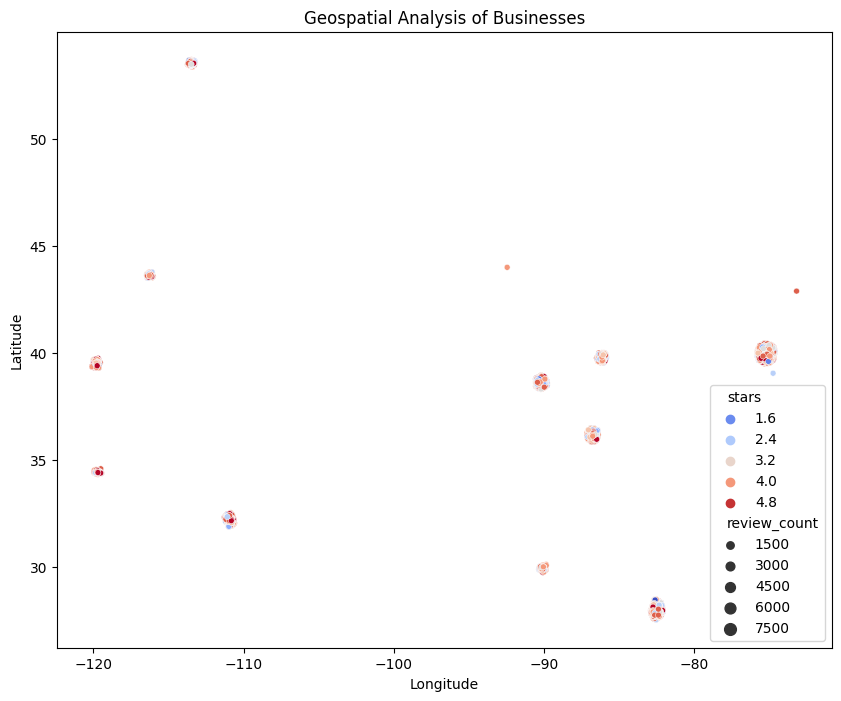

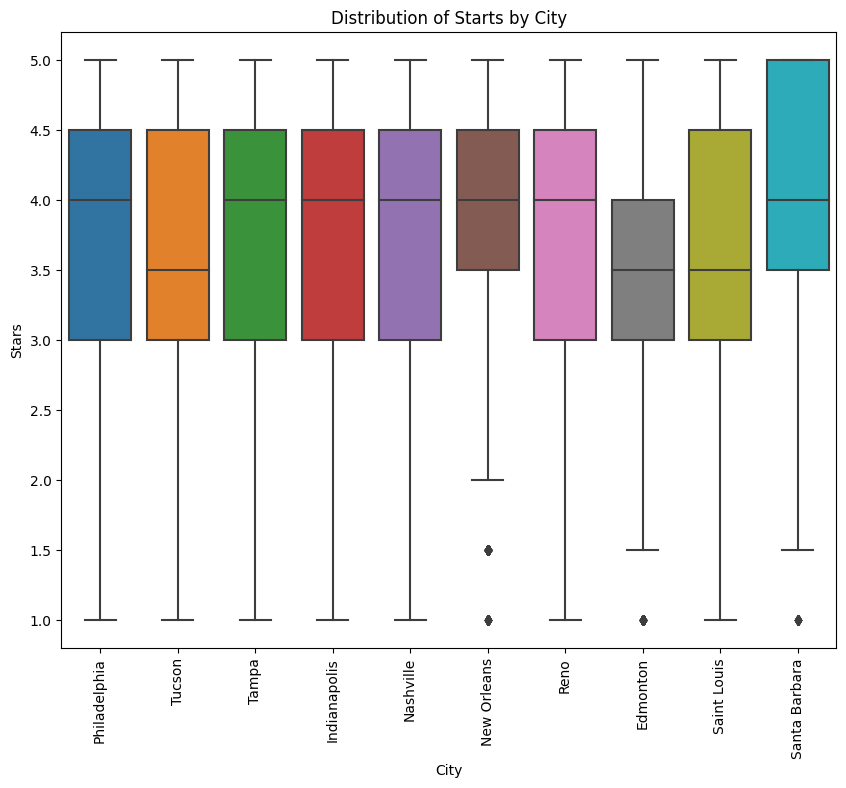

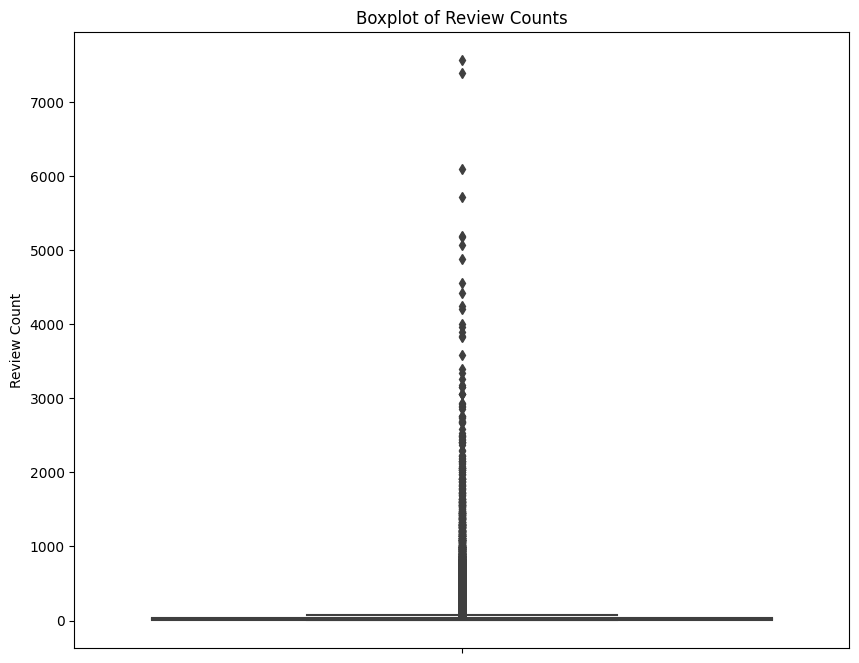

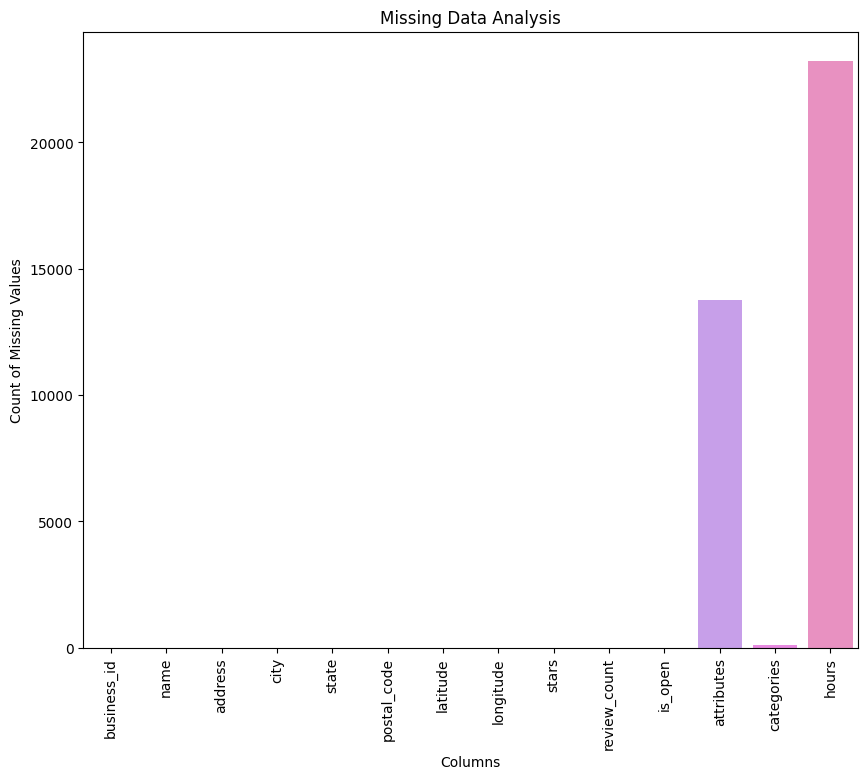

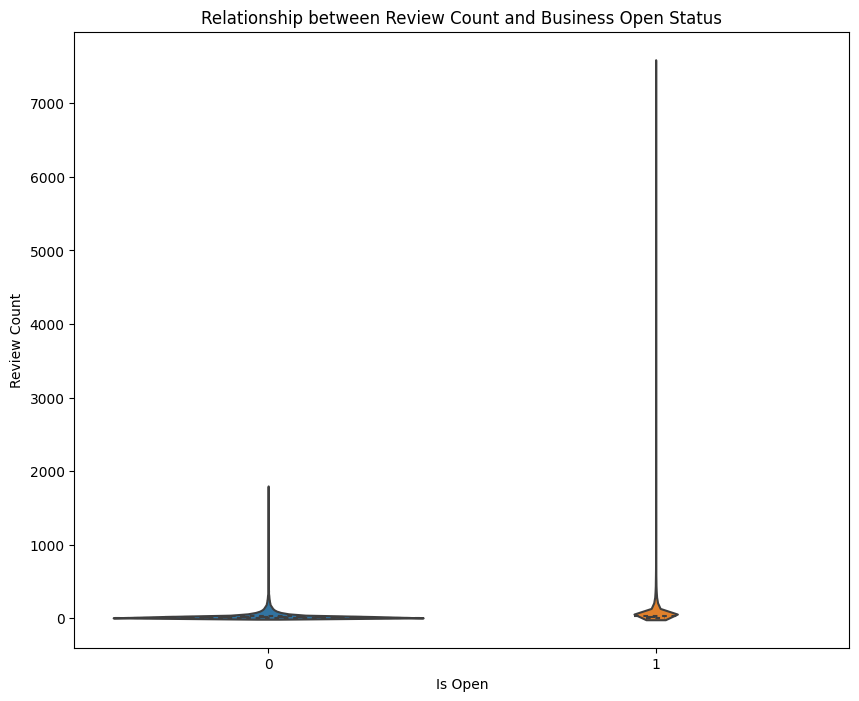

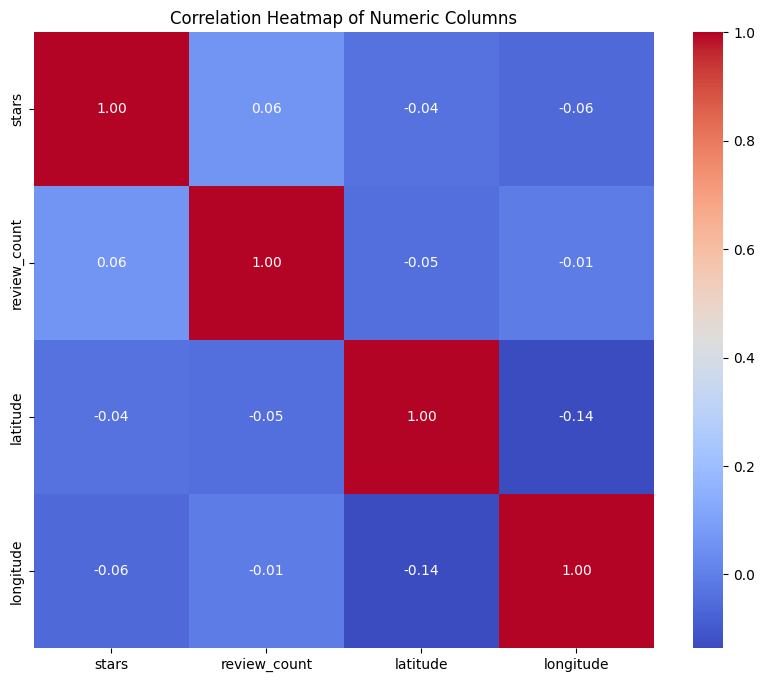

<Figure size 1000x800 with 0 Axes>

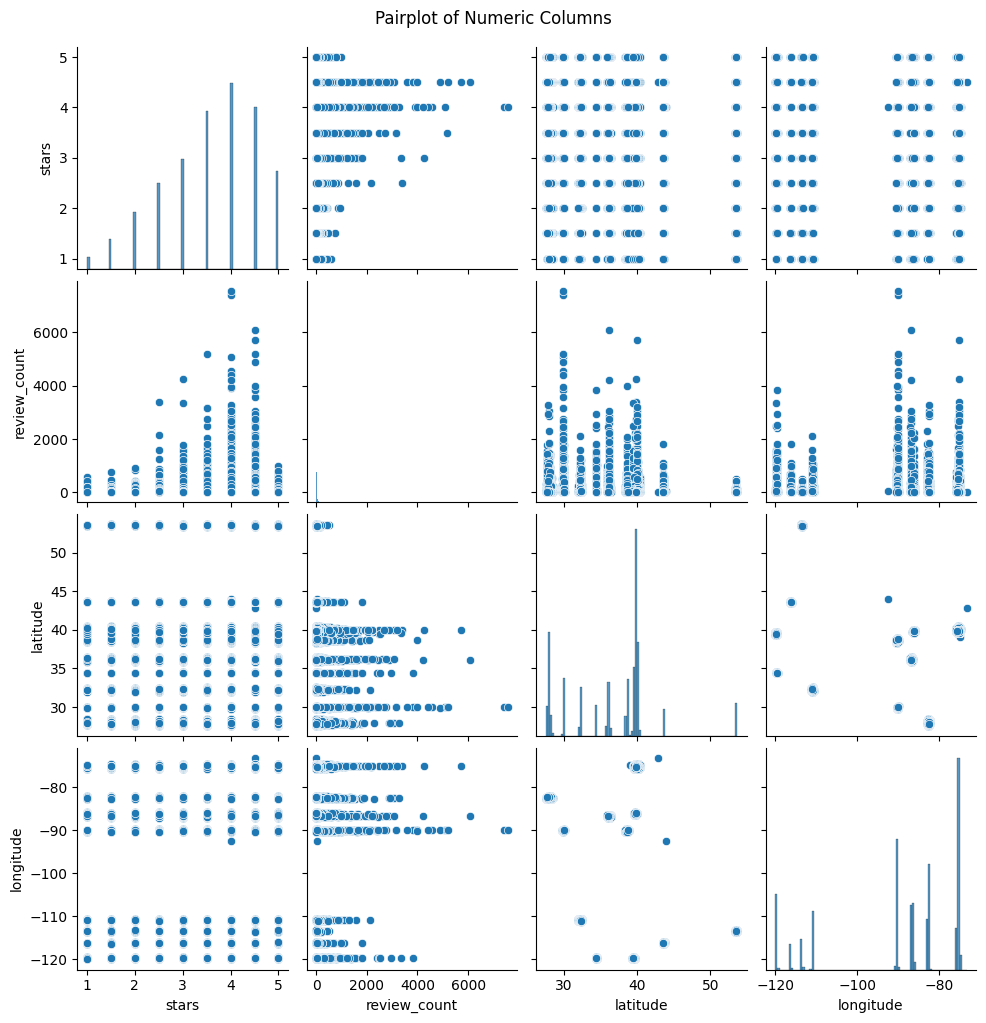

ValueError: Only supported for TrueType fonts

<Figure size 1000x800 with 0 Axes>

In [6]:
# Configure the size of the graphs
plt.rcParams['figure.figsize'] = (10, 8)

# Distribution of Star Ratings
plt.figure()
sns.countplot(data=business, x='stars')
plt.title("Distribution of Star Ratings")
plt.xlabel("Stars")
plt.ylabel("Count")

# Distribution of Review Counts
plt.figure()
sns.histplot(data=business, x='review_count', bins=30, kde=True)
plt.title("Distribution of Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Frequency")

# Relationship between Stars and Review Counts
plt.figure()
sns.scatterplot(data=business, x='stars', y='review_count')
plt.title("Relationship between Stars and Review Counts")
plt.xlabel("Stars")
plt.ylabel("Review Count")

# Relationship between Business Open Status and Stars
plt.figure()
sns.boxplot(data=business, x='is_open', y='stars')
plt.title("Relationship between Business Open Status and Stars")
plt.xlabel("Is Open")
plt.ylabel("Stars")

# Distribution of Cities
plt.figure()
sns.countplot(data=business, x='city', order=business['city'].value_counts().index)
plt.title("Distribution of Businesses by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Business Categories Analysis
plt.figure()
sns.countplot(data=business, y='categories', order=business['categories'].value_counts().iloc[:10].index)
plt.title("Top 10 Categories of Businesses")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Geospatial Analysis
plt.figure()
sns.scatterplot(data=business, x='longitude', y='latitude', hue='stars', palette='coolwarm', size='review_count')
plt.title("Geospatial Analysis of Businesses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# City Comparison
plt.figure()
sns.boxplot(data=business, x='city', y='stars', order=business['city'].value_counts().iloc[:10].index)
plt.title("Distribution of Starts by City")
plt.xlabel("City")
plt.ylabel("Stars")
plt.xticks(rotation=90)
plt.show()

# Outliers Analysis
plt.figure()
sns.boxplot(data=business, y='review_count')
plt.title("Boxplot of Review Counts")
plt.ylabel("Review Count")
plt.show()

# Missing Data Analysis
missing_data = business.isnull().sum()
plt.figure()
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title("Missing Data Analysis")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.show()

# Review Count vs. Star Ratings (with Kernel Density Estimate)
# plt.figure()
# sns.kdeplot(data=business, x='review_count', y='stars', cmap='viridis', fill=True, levels=15)
# plt.title("Review Count vs. Star Ratings")
# plt.xlabel("Review Count")
# plt.ylabel("Stars")
#plt.show()

# Relationship between Review Count and Business Open Status
plt.figure()
sns.violinplot(data=business, x='is_open', y='review_count', inner='quart')
plt.title("Relationship between Review Count and Business Open Status")
plt.xlabel("Is Open")
plt.ylabel("Review Count")
plt.show()

# Correlation Heatmap of Numeric Columns
numeric_cols = ['stars', 'review_count', 'latitude', 'longitude']
correlation_matrix = business[numeric_cols].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# Pairplot for Numeric Columns
plt.figure()
sns.pairplot(business[numeric_cols])
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()

# Word Cloud for Business Categories
plt.figure()
categories_text = ' '.join(business['categories'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(categories_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Business Categories")
plt.show()

# Barplot for Average Stars by State
plt.figure()
average_stars_by_state = business.groupby('state')['stars'].mean().sort_values(ascending=False)
sns.barplot(x=average_stars_by_state.index, y=average_stars_by_state.values)
plt.title("Average Stars by State")
plt.xlabel("State")
plt.ylabel("Average Stars")
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis: Stars vs. Review Count and Is Open
plt.figure()
sns.lmplot(data=business, x='review_count', y='stars', hue='is_open', markers=["o", "x"], palette="Set1")
plt.title("Multivariate Analysis: Stars vs. Review Count and Is Open")
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.show()

###         2.1.2 EDA for the table REVIEWS</h2>

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

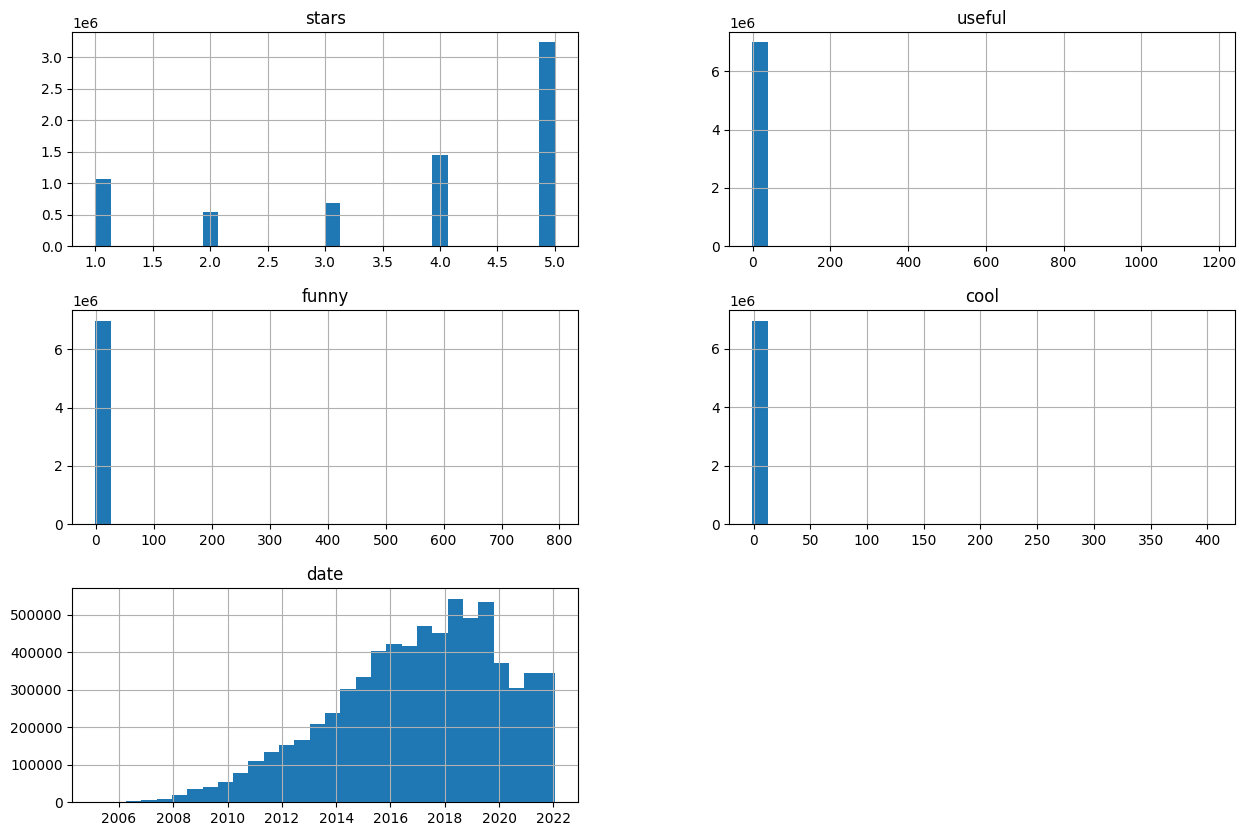

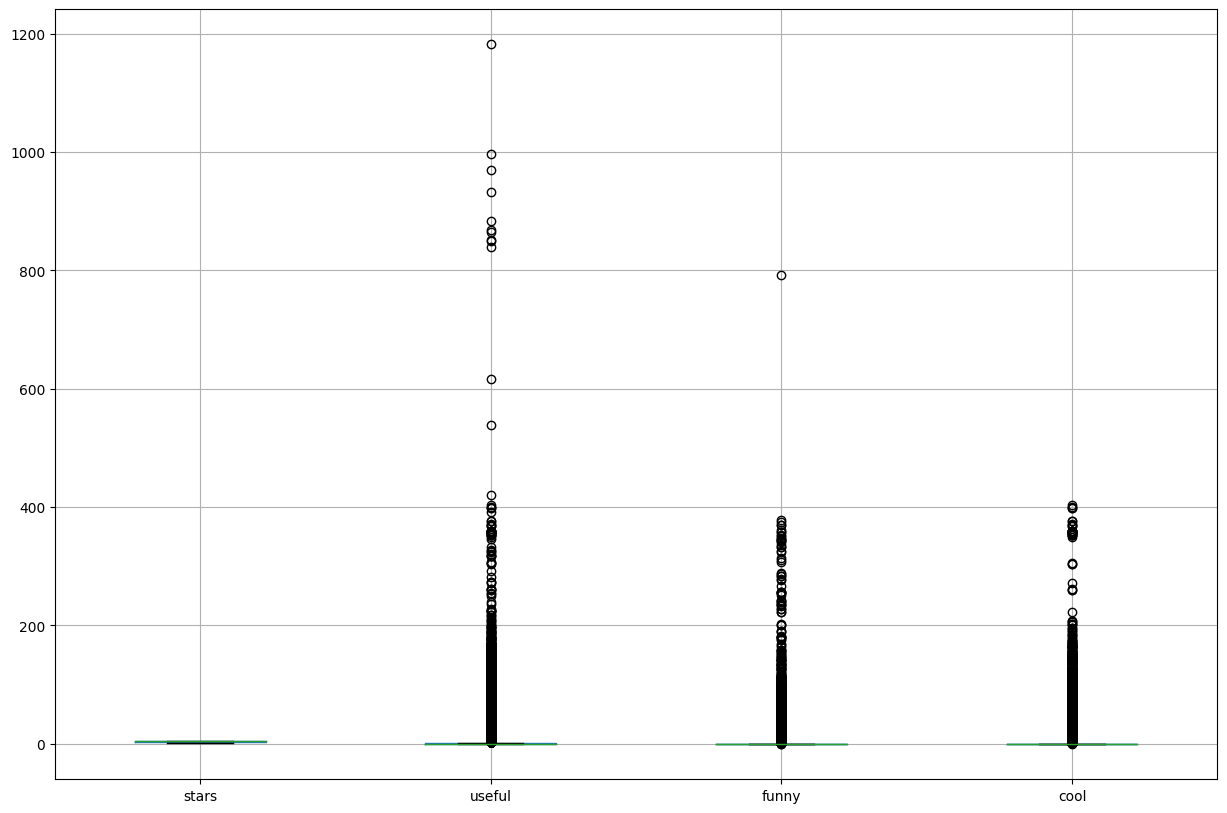

In [4]:
# Checking the first rows of the DataFrame
print(reviews.head())

# Statistical summary of numerical columns
print(reviews.describe())

# Information about the DataFrame
print(reviews.info())

# Checking for missing values
print(reviews.isnull().sum())
missing_data = reviews.isnull().sum()
print("Missing values:\n", missing_data)

# Histograms for numerical columns
reviews.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots for numerical columns
reviews.boxplot(figsize=(15, 10))
plt.show()

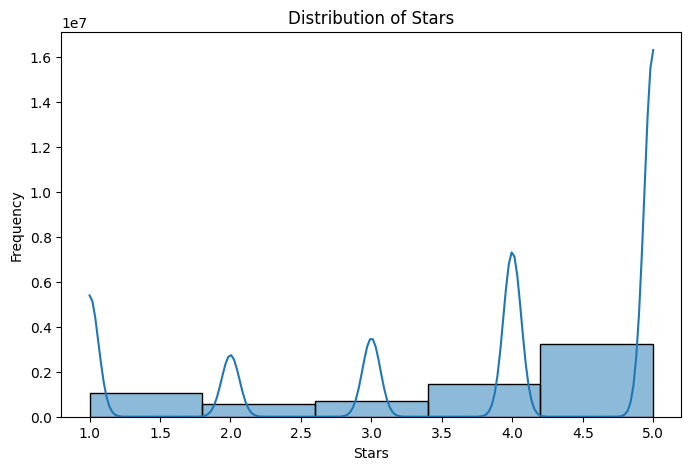

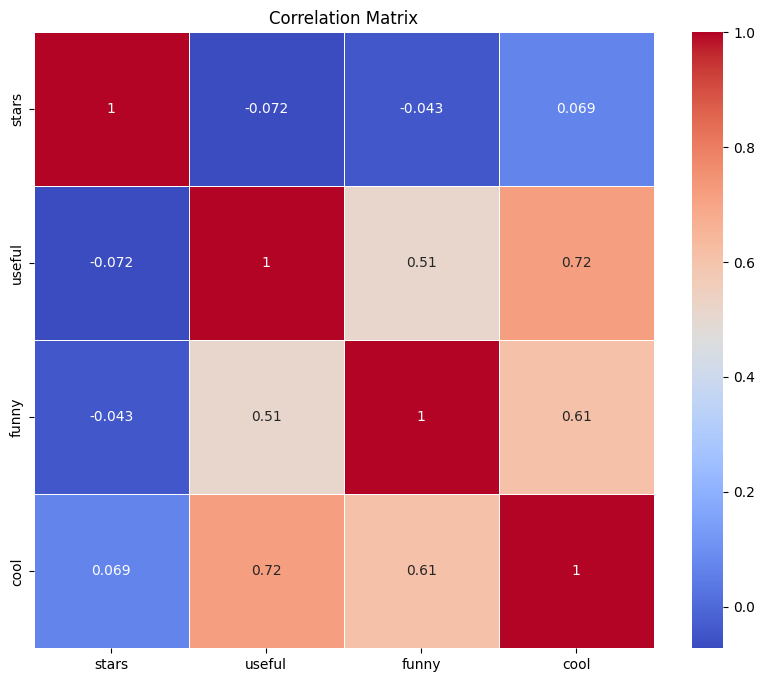

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.
Average length of reviews: 567.7644364746477


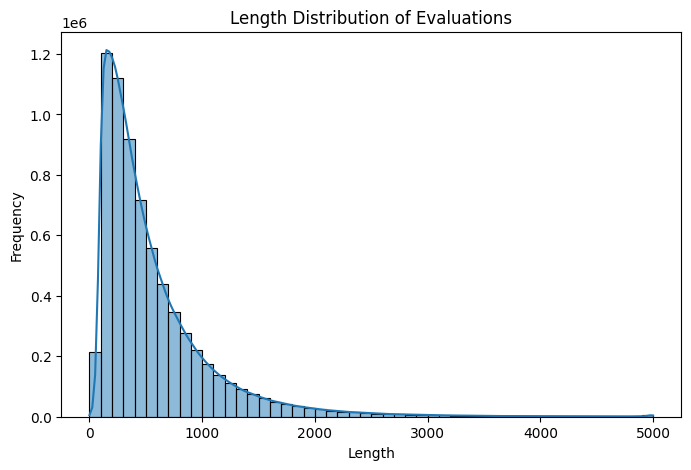

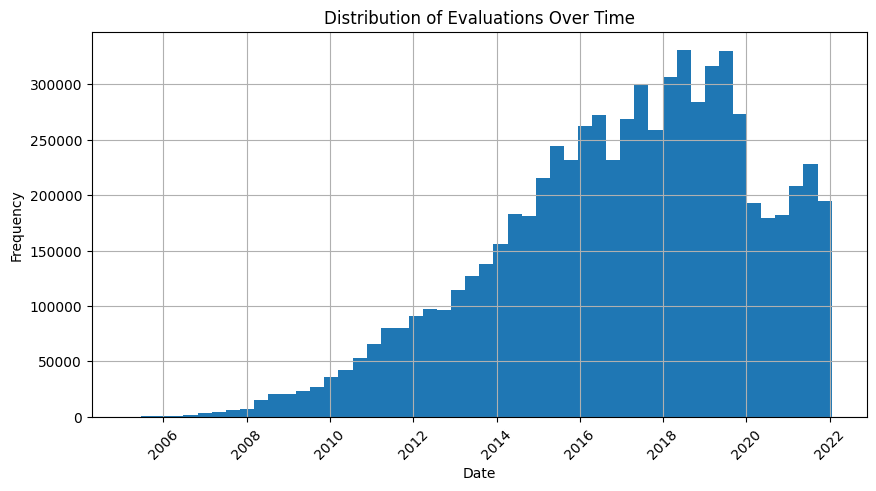

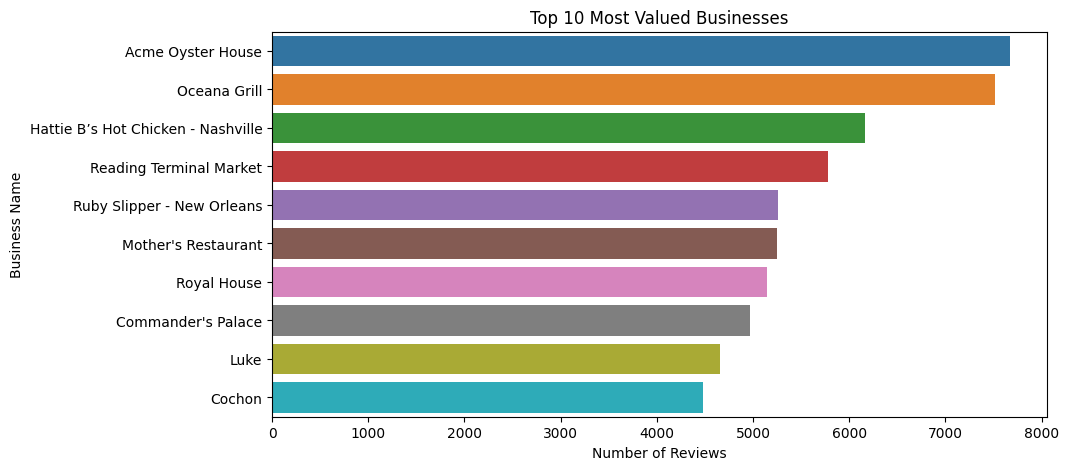

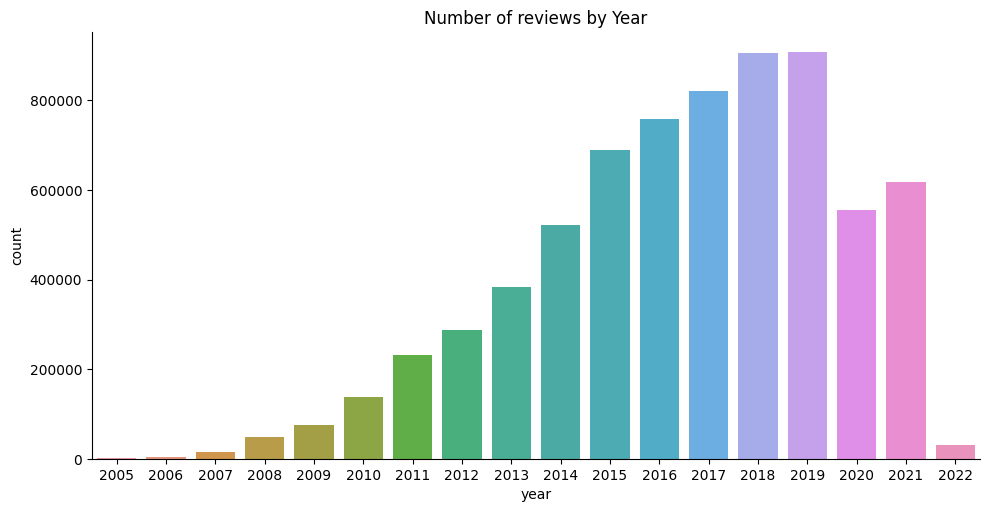

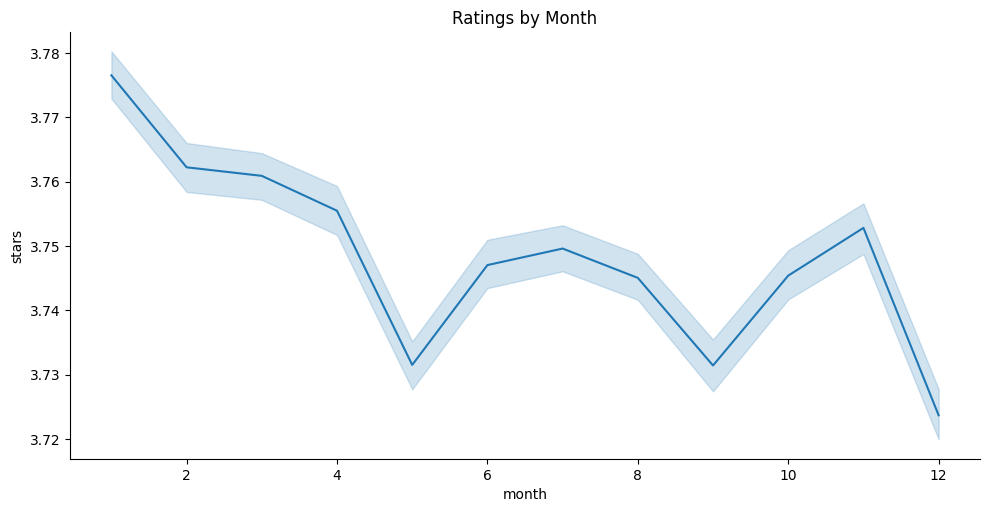

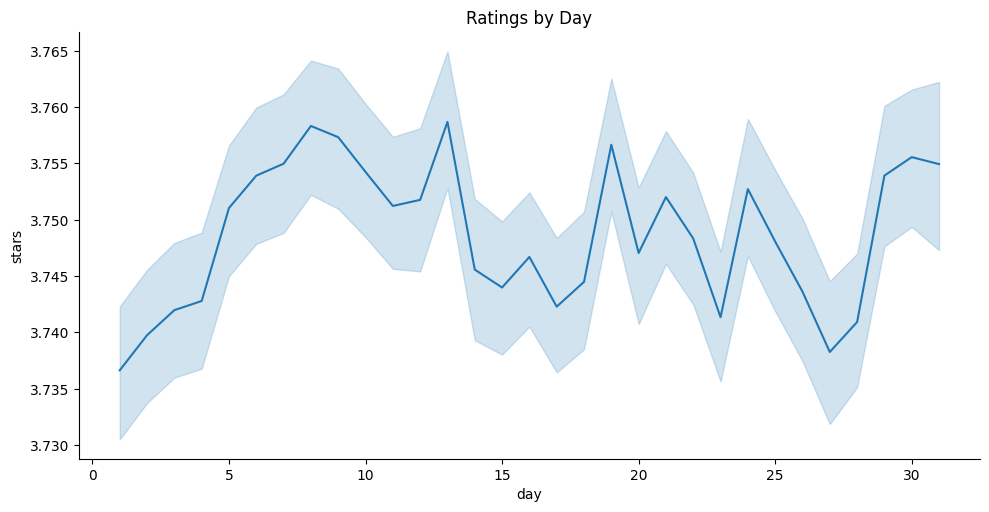

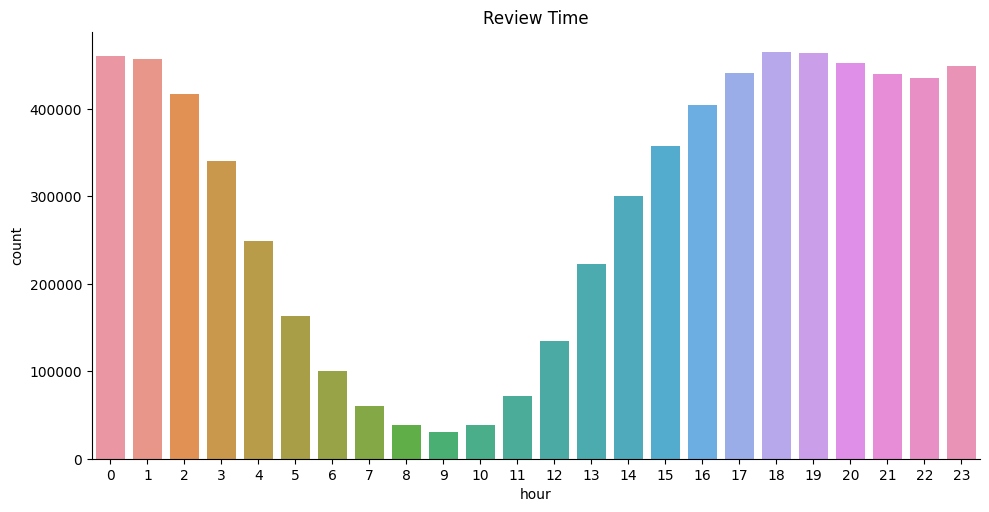

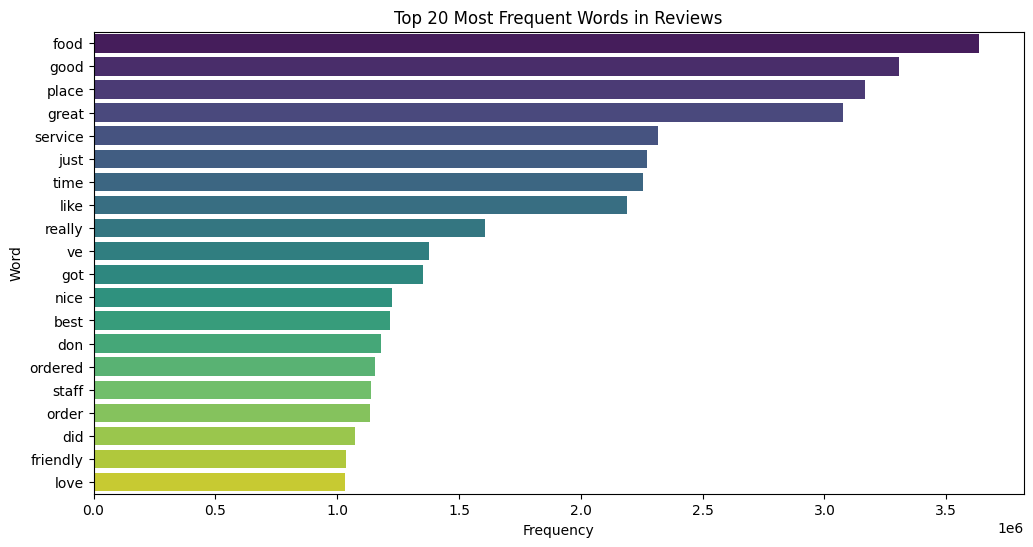

In [8]:
# Distribution of stars
plt.figure(figsize=(8, 5))
sns.histplot(reviews['stars'], bins=5, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = reviews.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Example of an evaluation
print(reviews['text'][0])

# Average length of reviews
reviews['text_length'] = reviews['text'].apply(len)
print("Average length of reviews:", reviews['text_length'].mean())

# View length of reviews
plt.figure(figsize=(8, 5))
sns.histplot(reviews['text_length'], bins=50, kde=True)
plt.title('Length Distribution of Evaluations')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Convert date column to datetime type
reviews['date'] = pd.to_datetime(reviews['date'])

# Visualization of the distribution of reviews over time
plt.figure(figsize=(10, 5))
reviews['date'].hist(bins=50)
plt.title('Distribution of Evaluations Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# I'll create a mapping dictionary between business_id and name
business_name_mapping = dict(zip(business['business_id'], business['name']))

# Example of category analysis with business names
top_businesses = reviews['business_id'].value_counts().head(10)
top_businesses_names = [business_name_mapping[bus_id] for bus_id in top_businesses.index]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_businesses.values, y=top_businesses_names, orient='h')
plt.title('Top 10 Most Valued Businesses')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Name')
plt.show()


# Create a DataFrame from the list of reviews
df_reviews_date = reviews

# Convert the 'date' column to datetime format
df_reviews_date['date'] = pd.to_datetime(df_reviews_date['date'])

# Create separate columns for year, month, day, hour, minute and second
df_reviews_date['year'] = df_reviews_date['date'].dt.year
df_reviews_date['month'] = df_reviews_date['date'].dt.month
df_reviews_date['day'] = df_reviews_date['date'].dt.day
df_reviews_date['hour'] = df_reviews_date['date'].dt.hour
df_reviews_date['minute'] = df_reviews_date['date'].dt.minute
df_reviews_date['second'] = df_reviews_date['date'].dt.second

# Example to count the number of reviews per year
g = sns.catplot(data=df_reviews_date, x='year', kind='count', aspect=2)
ax = plt.gca()
ax.set_title('Number of reviews by Year')

#Example to create a ranking line chart by month
g = sns.relplot(data=df_reviews_date, x='month', y='stars', aspect=2, kind='line')
ax = plt.gca()
ax.set_title('Ratings by Month')

g = sns.relplot(data=df_reviews_date, x='day', y='stars', aspect=2, kind='line')
ax = plt.gca()
ax.set_title('Ratings by Day')

sns.catplot(data=df_reviews_date, x='hour', aspect=2, kind='count')
ax = plt.gca()
ax.set_title('Review Time')

# Analysis of Most Frequent Words
vectorizer = CountVectorizer(stop_words='english', max_features=100)
word_counts = vectorizer.fit_transform(reviews['text'])
word_list = vectorizer.get_feature_names_out()
word_freq = word_counts.sum(axis=0).tolist()[0]
word_freq_df = pd.DataFrame({'Word': word_list, 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df.head(20), x='Frequency', y='Word', orient='h', palette='viridis')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Topics Analyse
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# topic_matrix = lda.fit_transform(word_counts)
# topics = lda.components_
# top_words = [word_list[i] for i in topics.argsort()[:, ::-1][:, :5]]
# topic_df = pd.DataFrame({'Topic': range(5), 'Top Words': top_words})
# for i, row in topic_df.iterrows():
#    print(f"Topic {row['Topic']}: {', '.join(row['Top Words'])}")

###      2.1.3 EDA for the table USERS</h2>

                  user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  average_stars  \
0  NSCy54eWehBJyZdG2i

       review_count        useful         funny          cool          fans  \
count  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06   
mean   2.339441e+01  4.229634e+01  1.697054e+01  2.379291e+01  1.465740e+00   
std    8.256699e+01  6.414806e+02  4.078034e+02  5.653513e+02  1.813075e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    5.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.700000e+01  1.300000e+01  2.000000e+00  3.000000e+00  0.000000e+00   
max    1.747300e+04  2.062960e+05  1.858230e+05  1.998780e+05  1.249700e+04   

       average_stars  compliment_hot  compliment_more  compliment_profile  \
count   1.987897e+06    1.987897e+06     1.987897e+06        1.987897e+06   
mean    3.630494e+00    1.807072e+00     2.922631e-01        1.793176e-01   
std     1.183337e+00    7.360184e+01     1.282467e+01    

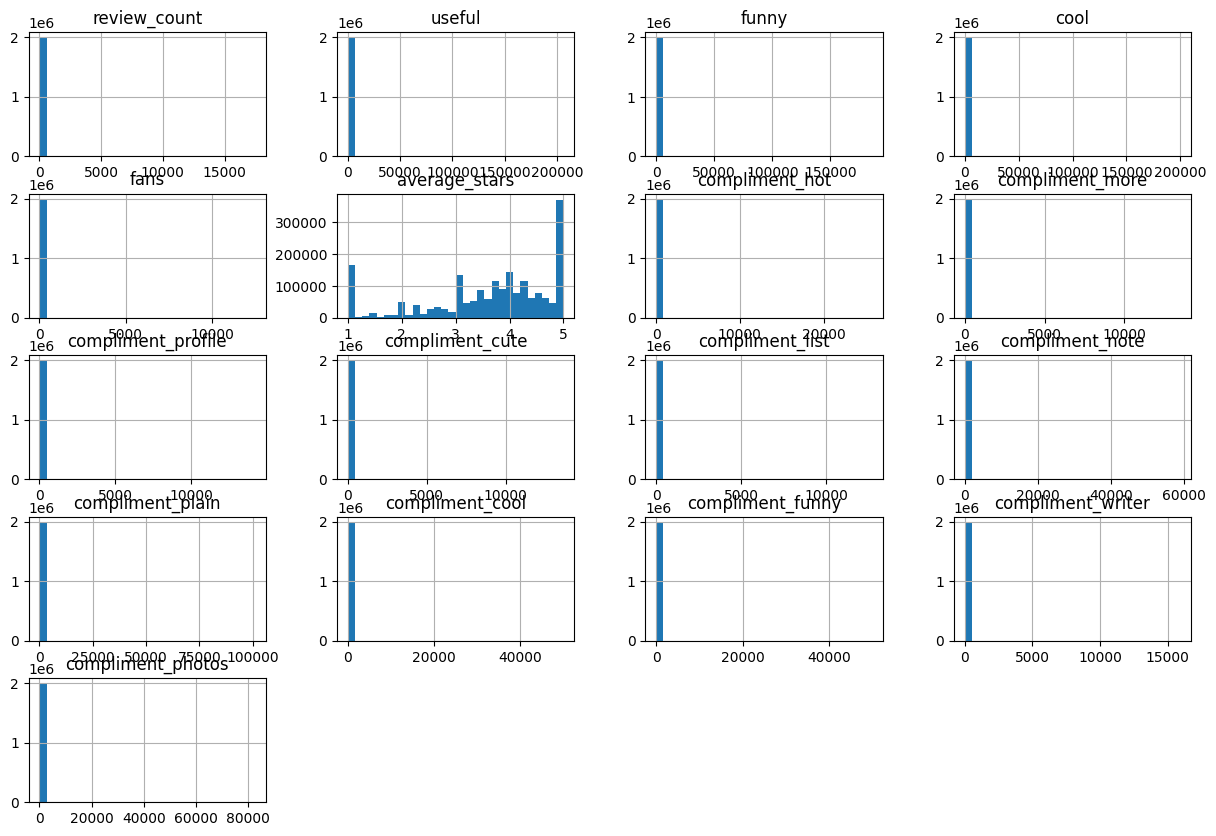

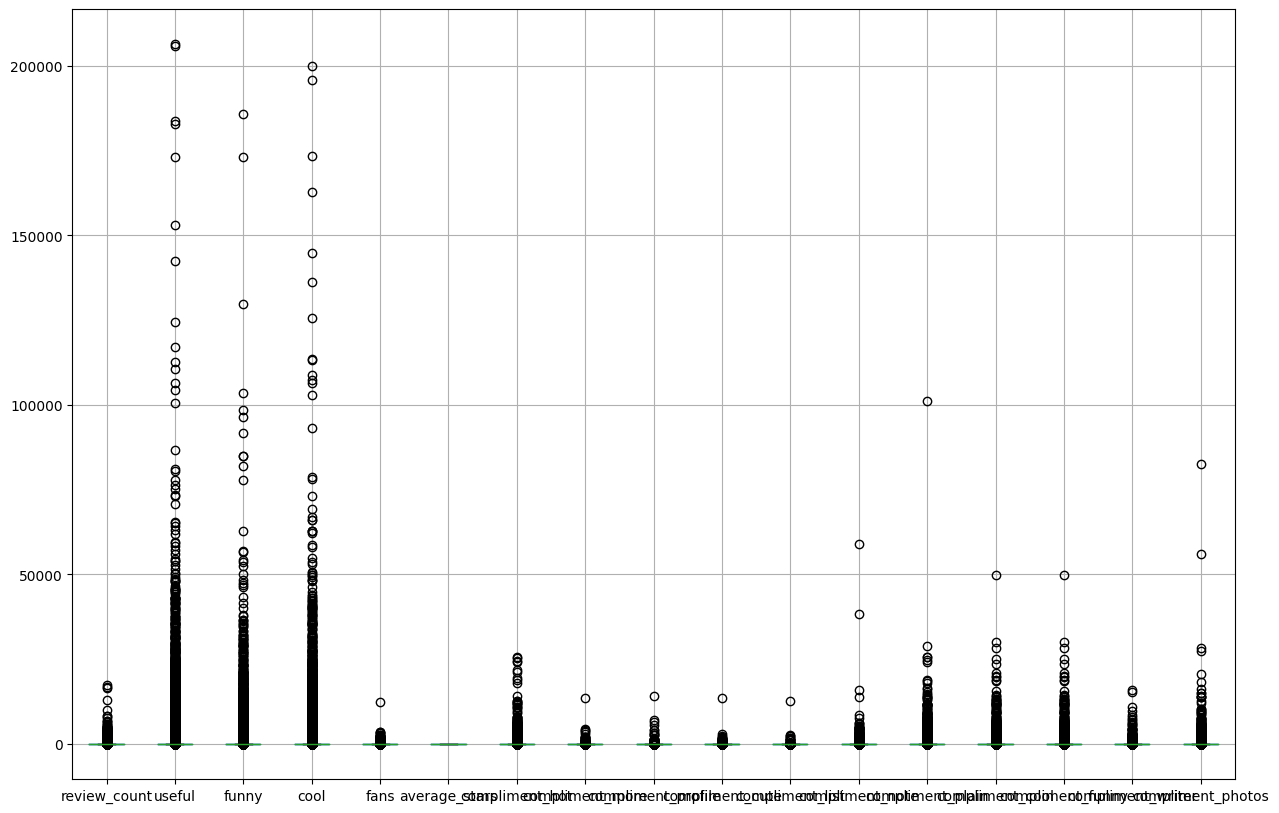

In [9]:
# Checking the first rows of the DataFrame
print(users.head())

# Statistical summary of numerical columns
print(users.describe())

# Information about the DataFrame
print(users.info())

# Checking for missing values
print(users.isnull().sum())
missing_data = users.isnull().sum()
print("Missing values:\n", missing_data)

# Histograms for numerical columns
users.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots for numerical columns
users.boxplot(figsize=(15, 10))
plt.show()

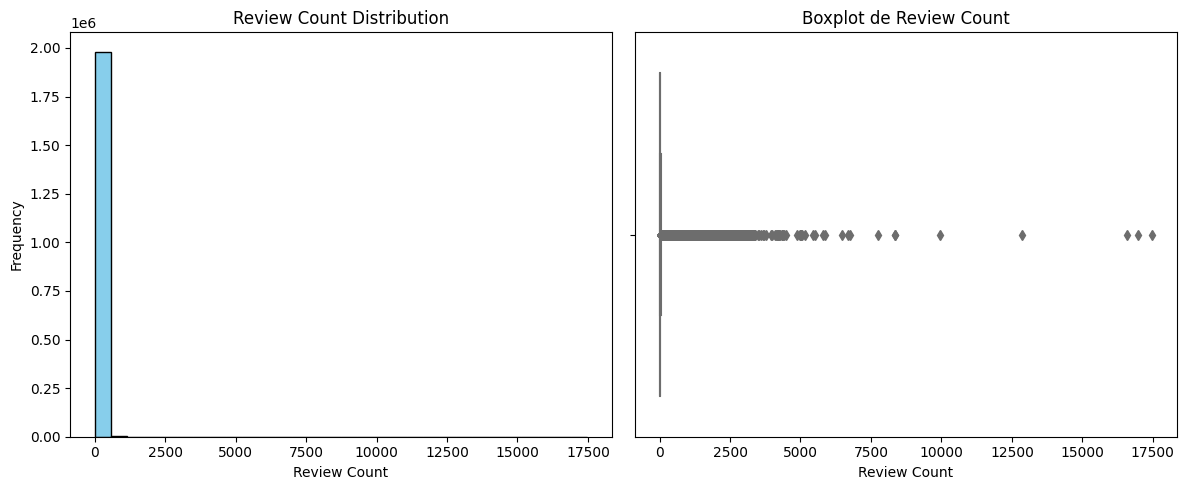

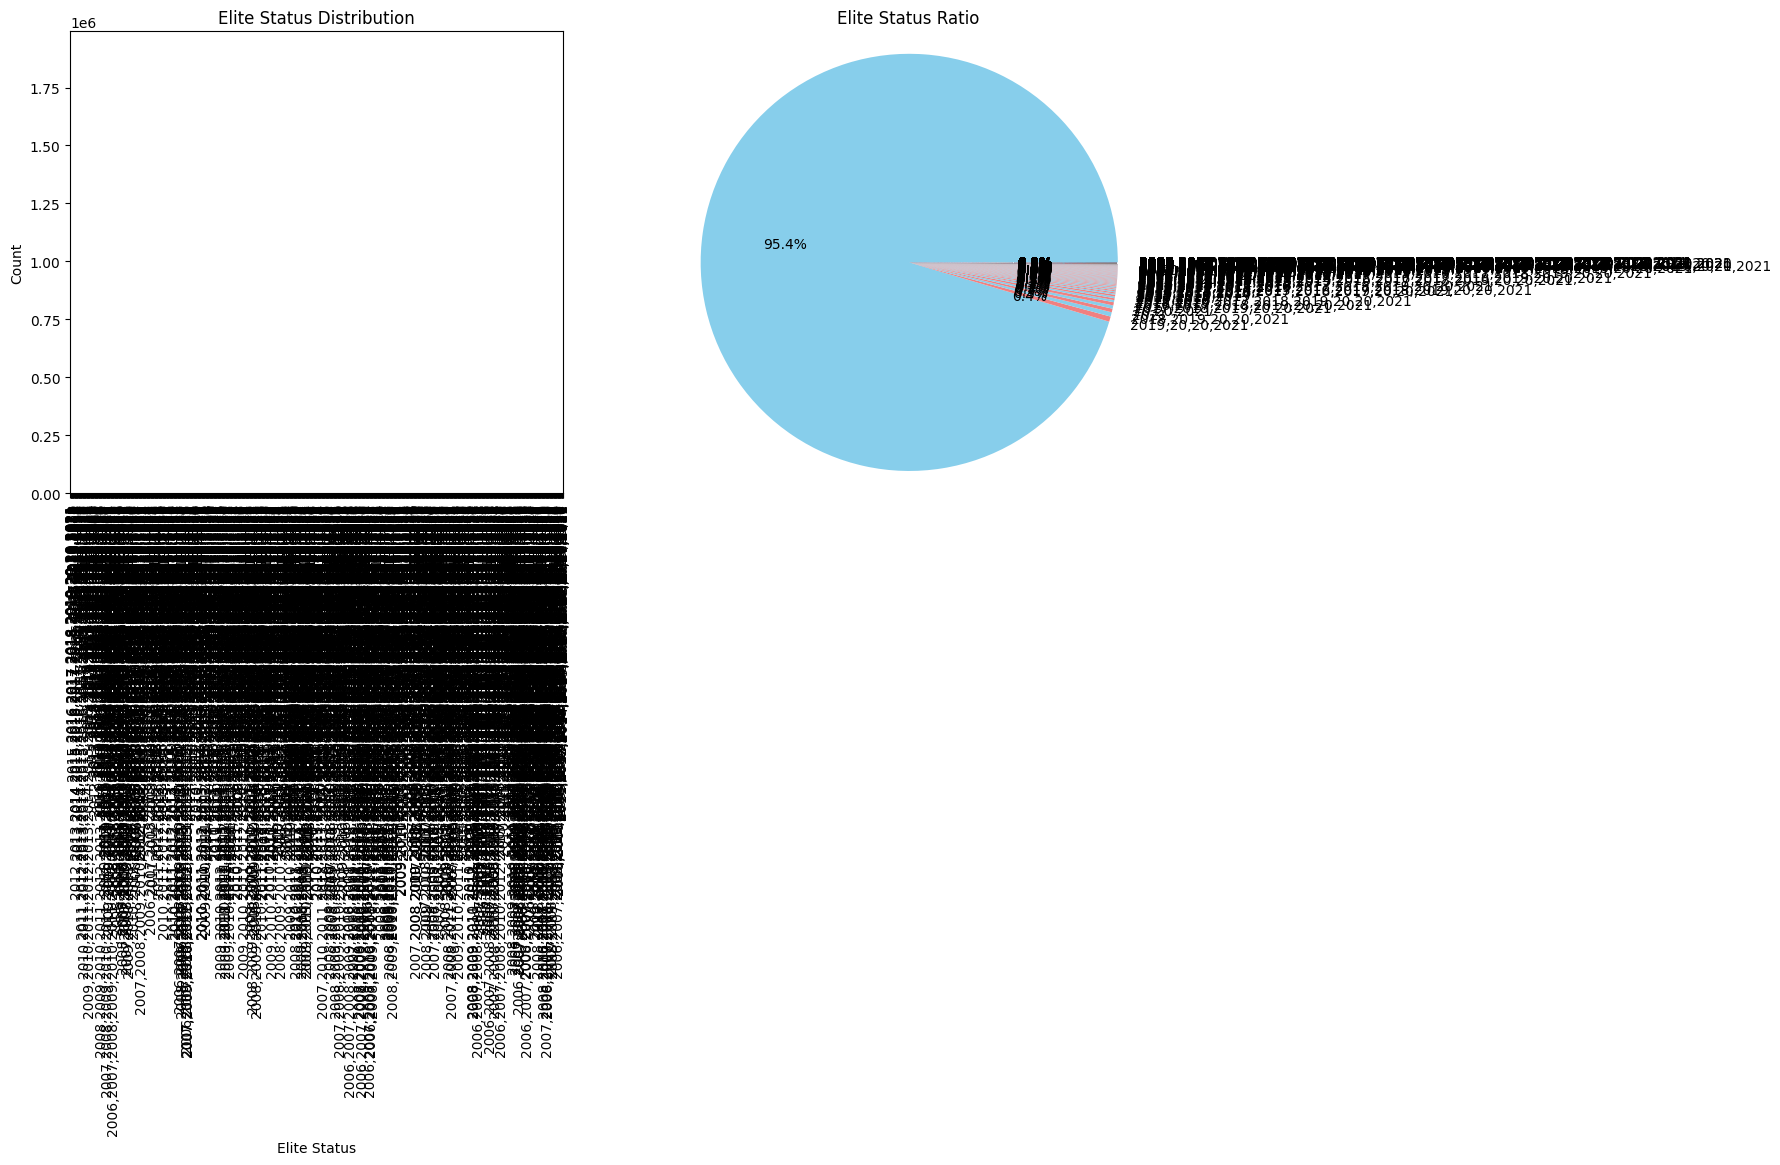

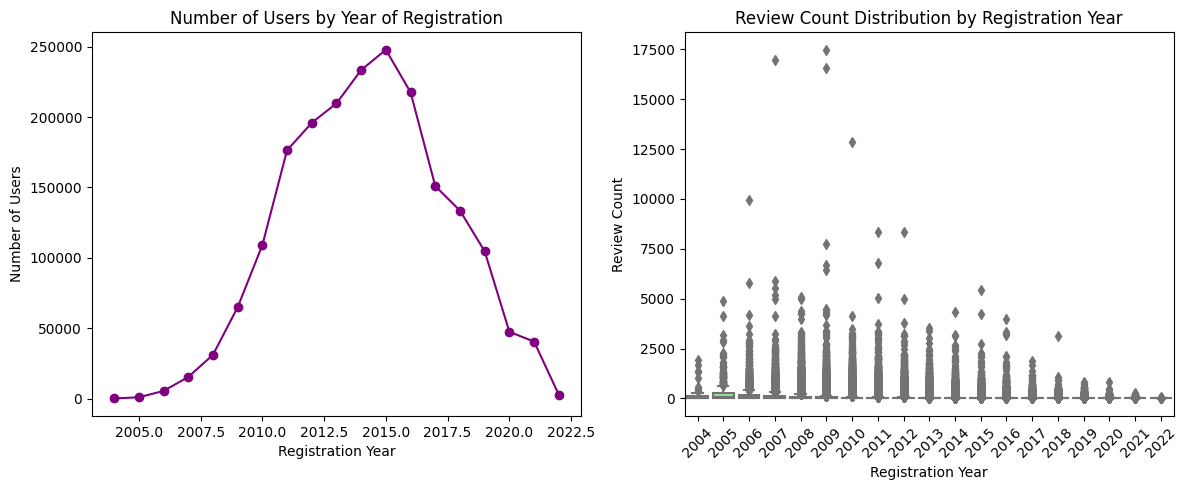

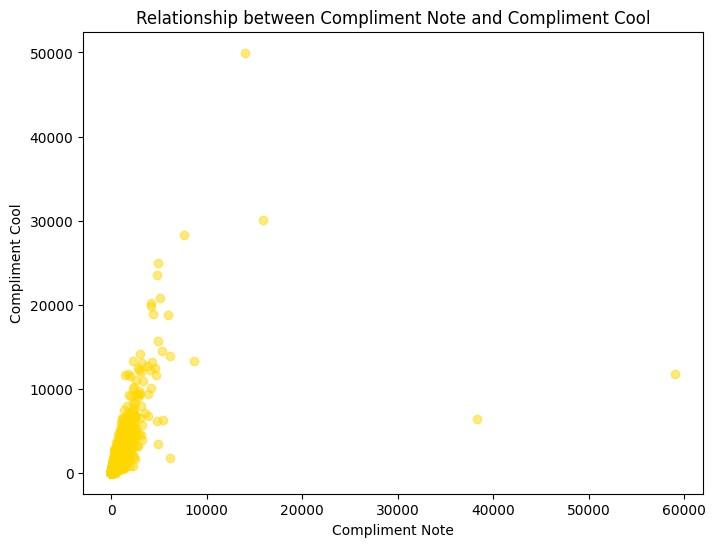

<Figure size 800x600 with 0 Axes>

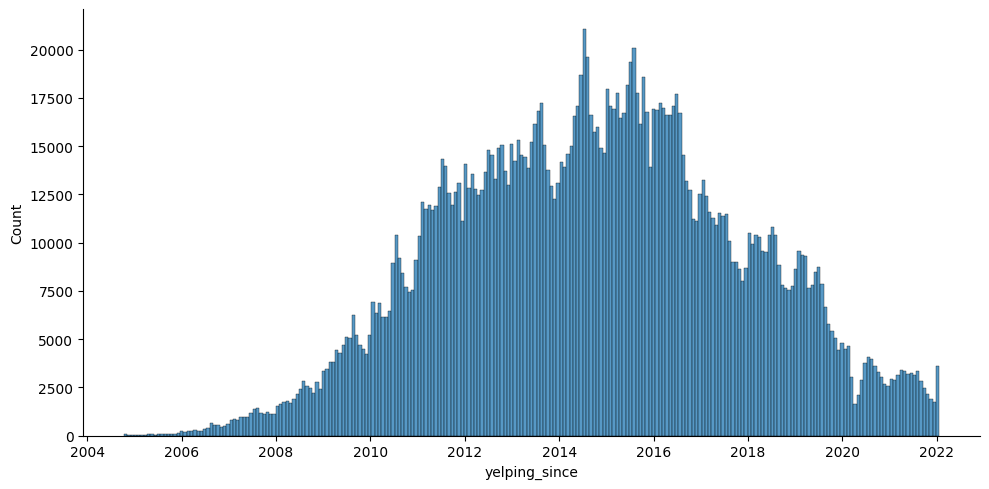

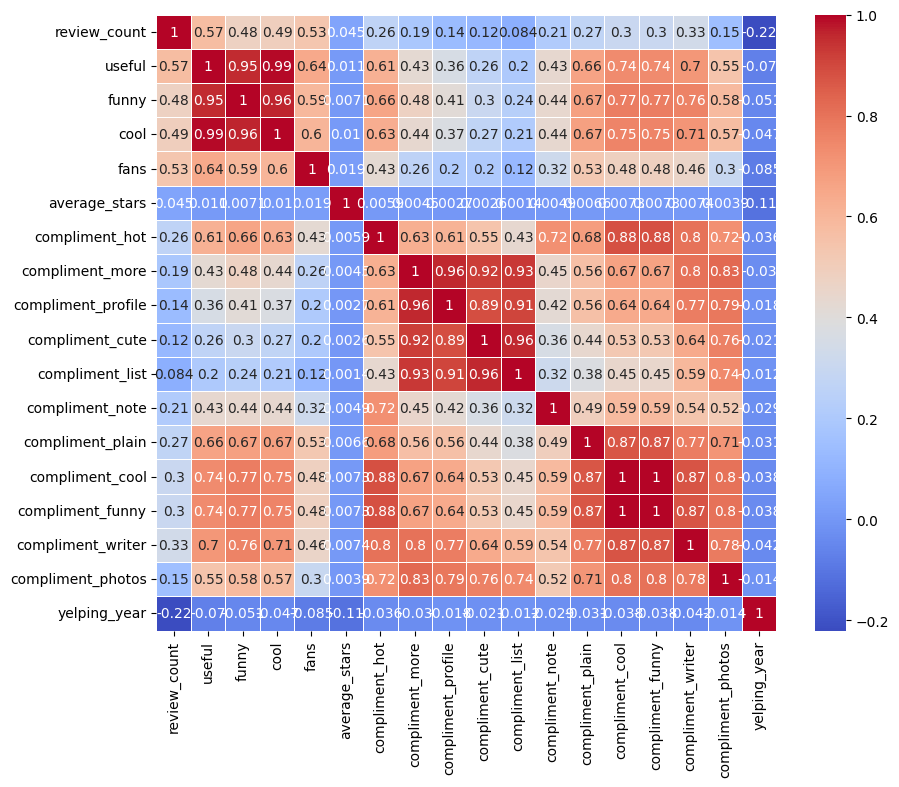

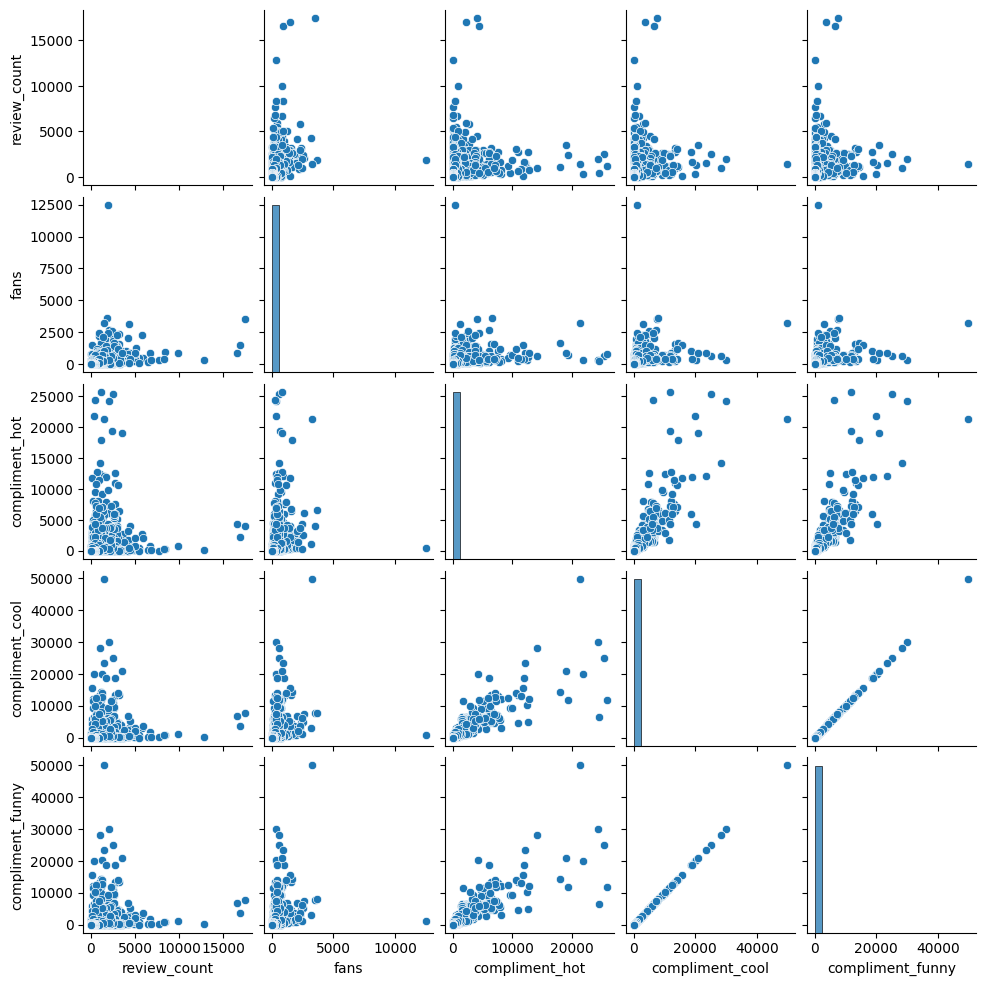

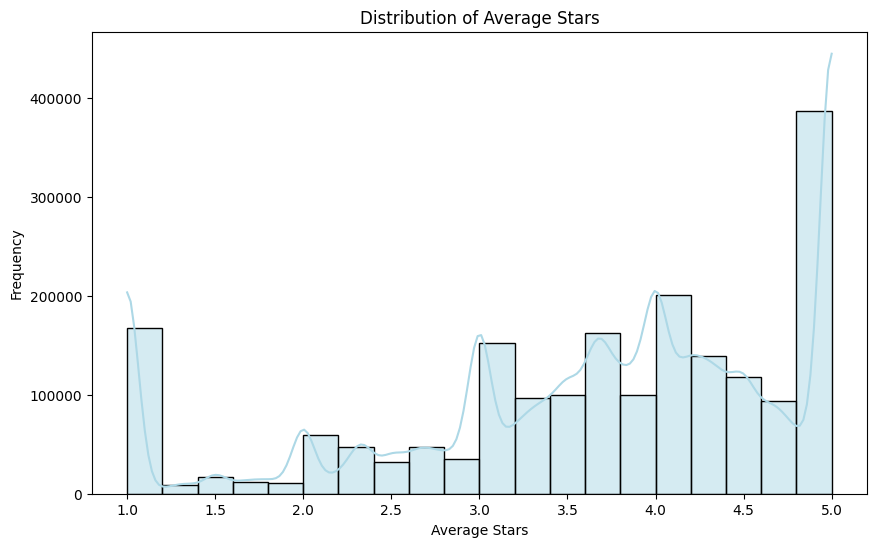

In [10]:
# Histograma e Boxplot para Contagem de Comentários
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(users['review_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Review Count Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='review_count', data=users, color='salmon')
plt.xlabel('Review Count')
plt.title('Boxplot de Review Count')
plt.tight_layout()

# Bar Graph for Elite Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
users['elite'].value_counts().plot(kind='bar', color='lightseagreen')
plt.xlabel('Elite Status')
plt.ylabel('Count')
plt.title('Elite Status Distribution')

plt.subplot(1, 2, 2)
plt.pie(users['elite'].value_counts(), labels=users['elite'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Elite Status Ratio')
plt.axis('equal')

# Temporal Analysis for Yelping Since
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
users['yelping_year'] = users['yelping_since'].dt.year

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
users['yelping_year'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.xlabel('Registration Year')
plt.ylabel('Number of Users')
plt.title('Number of Users by Year of Registration')

plt.subplot(1, 2, 2)
sns.boxplot(x='yelping_year', y='review_count', data=users, color='lightgreen')
plt.xlabel('Registration Year')
plt.ylabel('Review Count')
plt.title('Review Count Distribution by Registration Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Scatter Chart with Compliments
plt.figure(figsize=(8, 6))
plt.scatter(users['compliment_note'], users['compliment_cool'], alpha=0.5, color='gold')
plt.xlabel('Compliment Note')
plt.ylabel('Compliment Cool')
plt.title('Relationship between Compliment Note and Compliment Cool')

# Type Cast to datetime format
plt.figure(figsize=(8, 6))
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
sns.displot(data=users, x='yelping_since', aspect=2)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = users.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Pairplot for selected attributes
sns.pairplot(users[['review_count', 'fans', 'compliment_hot', 'compliment_cool', 'compliment_funny']], height=2)

# Additional Custom Visualization (you can add your own)
# For example, let's create a bar chart for 'average_stars' distribution.
plt.figure(figsize=(10, 6))
sns.histplot(data=users, x='average_stars', bins=20, kde=True, color='lightblue')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stars')

# Display all graphics
plt.show()


## 2.2 Analysing cities with more reviews and with high variance of stars in the reviews</h1>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>The idea with this analysis is to find the cities that have a higher variation on the reviews made by users on that location. Notice that both the business and reviews datasets have a column named 'stars', however the column chosen was from the reviews dataset because the other is simply the stars of the restaurant, not the stars given by users (interactions of our RS).</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>So, the code below computes the variance and the number of reviews for all 1320 cities that have at least one restaurant open, and sorts the resulting dataframe by the variance of the review's stars in a descending order. After that, only cities with more than 300.000 reviews are considered, and then the final selection results in the remaining 5 cities with the highest variance.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>We decided to apply a describe() to the stars of the reviews of each city, to better understand the distribution of reviews. Looking at the quartiles, the one that stood out was Tucson because at least 25% of the reviews have 2 stars or less, which shows more lower reviews than all other cities, with a first quartile of 3 stars.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>Therefore, given the importance of having a lot of reviews and a variety of review stars, it appears to us that Tucson is a very good candidate for the city to be chosen.</p>

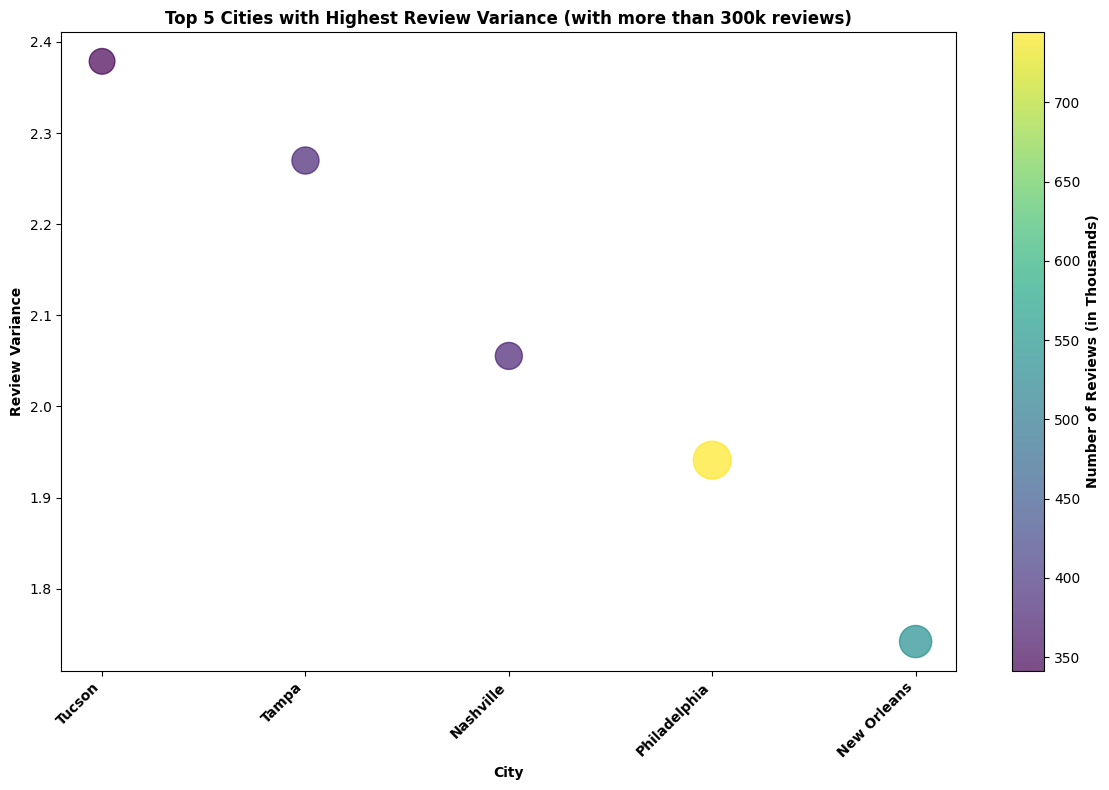

In [5]:
top5_variance_cities = utils.Top5VarianceCities(merged_df = cities_reviews)
top5_variance_cities

utils.ScatterPlotEDA(top5_variance_cities)

In [9]:
top5_cities = list(top5_variance_cities['city'])

city_describe = utils.DescribeCities(merged_df = cities_reviews, cities = top5_cities)
city_describe

,Tucson,Tampa,Nashville,Philadelphia,New Orleans
count,341468.000000,380129.000000,377389.000000,744111.000000,536736.000000
mean,3.720899,3.773532,3.846999,3.827116,3.971172
std,1.542284,1.506598,1.433681,1.393248,1.319891
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


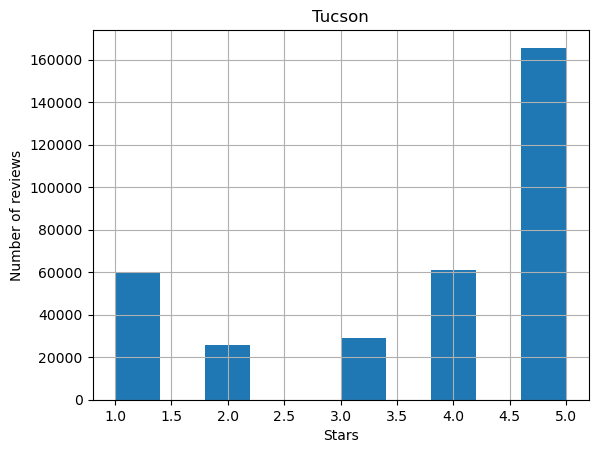

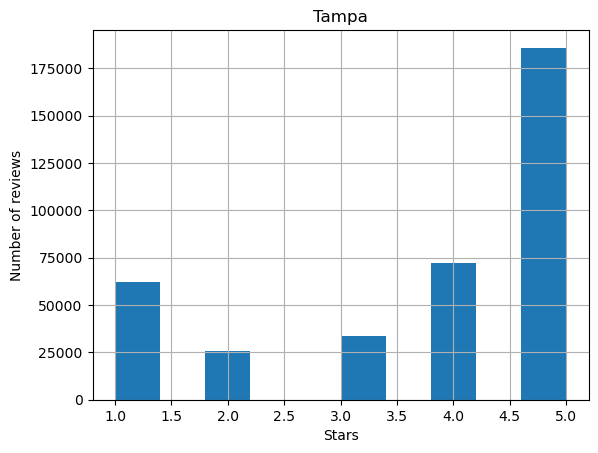

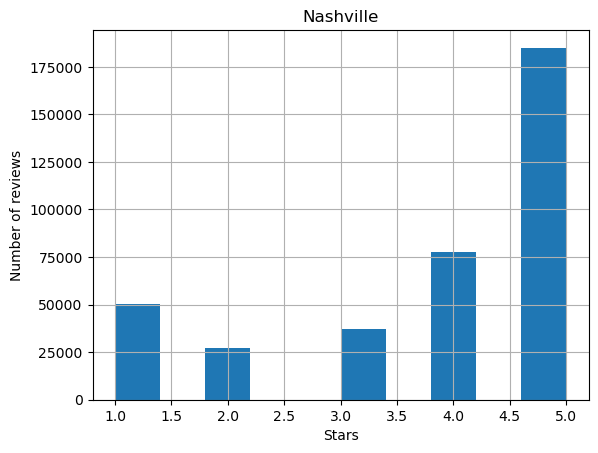

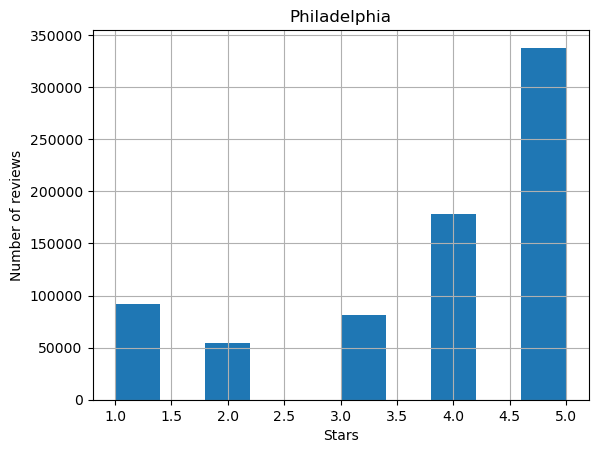

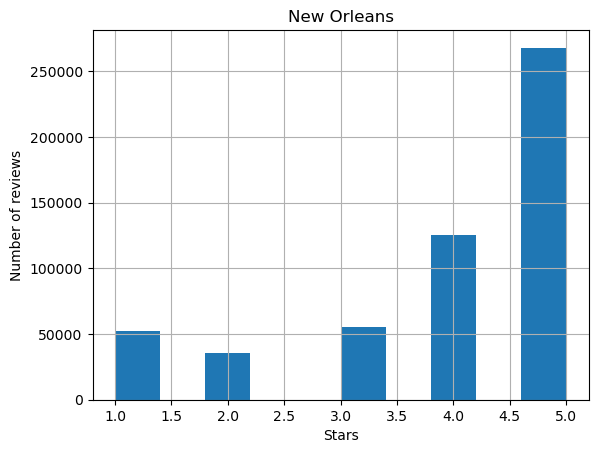

In [7]:
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[0])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[1])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[2])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[3])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[4])

### 2.3 Tucson</h1>


In [4]:
# 1. Filtering data for the city of Tucson and "open" in the "business" table only:
df_business_open_tucson = business[(business['city'] == 'Tucson') & (business['is_open'] == 1)]

# Filtering reviews related to businesses in Tucson:
df_reviews_tucson = reviews[reviews['business_id'].isin(df_business_open_tucson['business_id'])]

In [5]:
df_business_open_tucson.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
56,txyXRytGjwOXvS8s4sc-WA,Smoothie King,1070 E Tucson Marketplace Blvd,Tucson,AZ,85713,32.186794,-110.954765,3.0,29,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Vitamins & Supplements, Ice Cream & Frozen Yog...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-21:0', '..."
67,eYxGFkxo6m3SYGVTh5m2nQ,Big Boyz Toyz Motorcycle Rentals,4158 E Grant Rd,Tucson,AZ,85712,32.250324,-110.903655,4.5,8,1,None,"Towing, Hotels & Travel, Automotive, Motorcycl...","{'Monday': '8:30-18:0', 'Tuesday': '8:30-18:0'..."
121,luGY5CJlb4CJ3LrBcSXMPA,Desert Design Center,4146 E Speedway Blvd,Tucson,AZ,85712,32.235866,-110.903676,3.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Furniture Stores, Shopping, Home & Garden","{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'..."
125,wEfK2HIYNzkA1QYfUjHBaw,Leslie's,"7955 E Broadway Blvd, Ste 147",Tucson,AZ,85710,32.221542,-110.822101,2.5,15,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hardware Stores, Home Services, Hot Tub & Pool...","{'Monday': '9:0-17:0', 'Tuesday': '7:0-18:0', ..."


In [10]:
df_reviews_tucson.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
93,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04


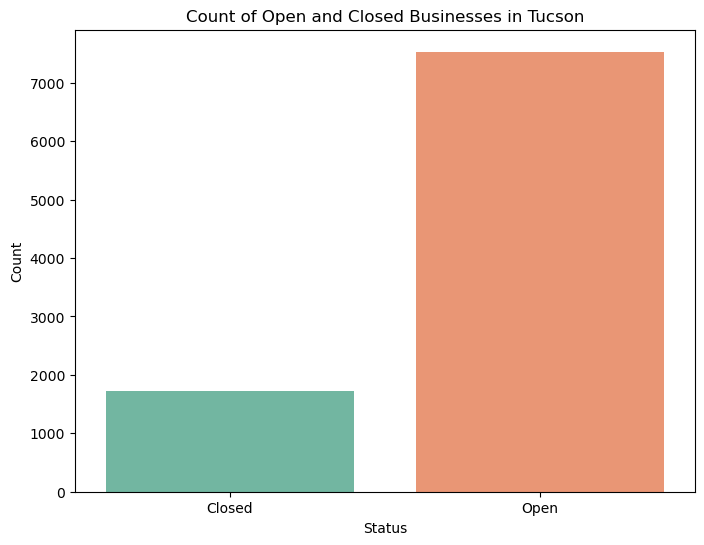

In [6]:
df_business_tucson = utils.OpenClosedTucson(business)

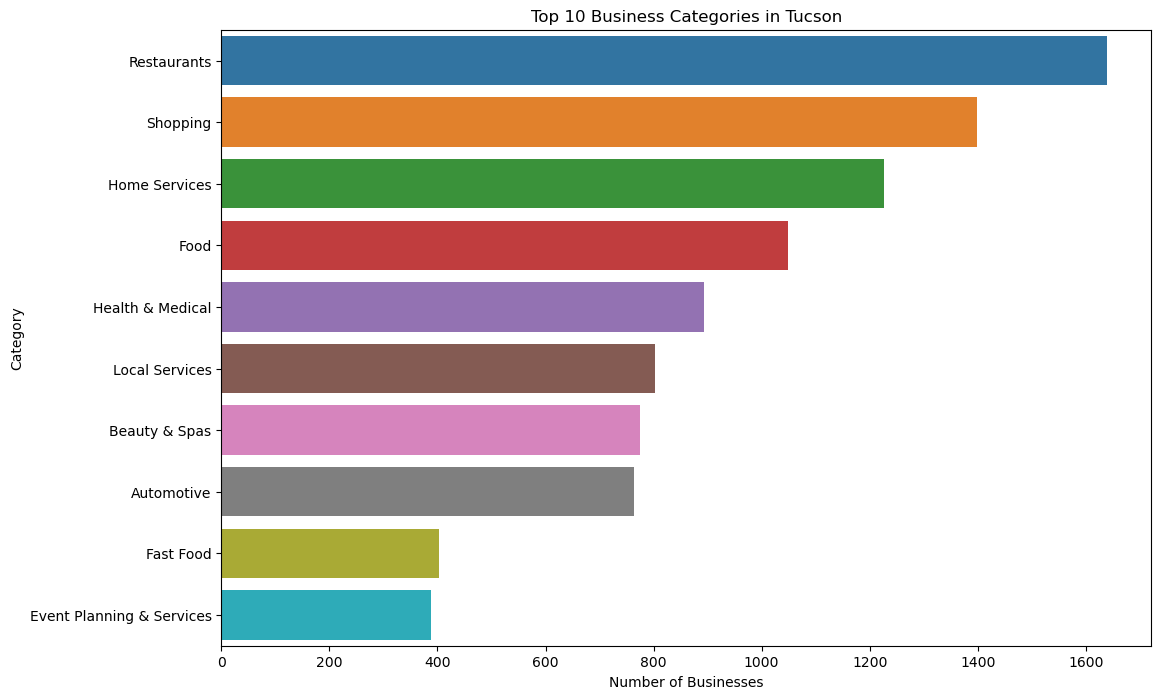

In [5]:
utils.Top10CommomCategoriesTucson(df_business_open_tucson)

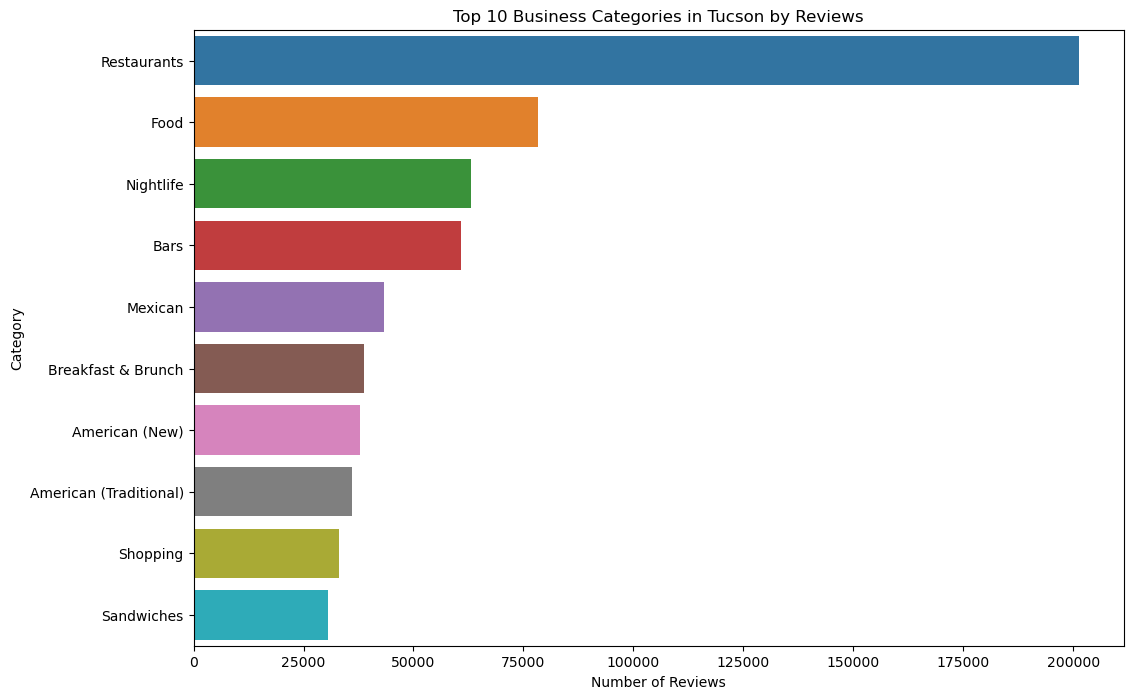

In [5]:
utils.Top10CategoriesByReviewsTucson(df_business_open_tucson, df_reviews_tucson)

/Users/luish/Desktop/Carreira/AcademicPath/Ensino Superior/Mestrados/DataScience&Engineering_FEUP/UnidadesCurriculares/2ndYear/1stSemester/AnalysisOfComplexData/project_repo/Recommendation-System---/utility_func.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_tucson['yelping_since'] = pd.to_datetime(df_users_tucson['yelping_since'])
/Users/luish/Desktop/Carreira/AcademicPath/Ensino Superior/Mestrados/DataScience&Engineering_FEUP/UnidadesCurriculares/2ndYear/1stSemester/AnalysisOfComplexData/project_repo/Recommendation-System---/utility_func.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

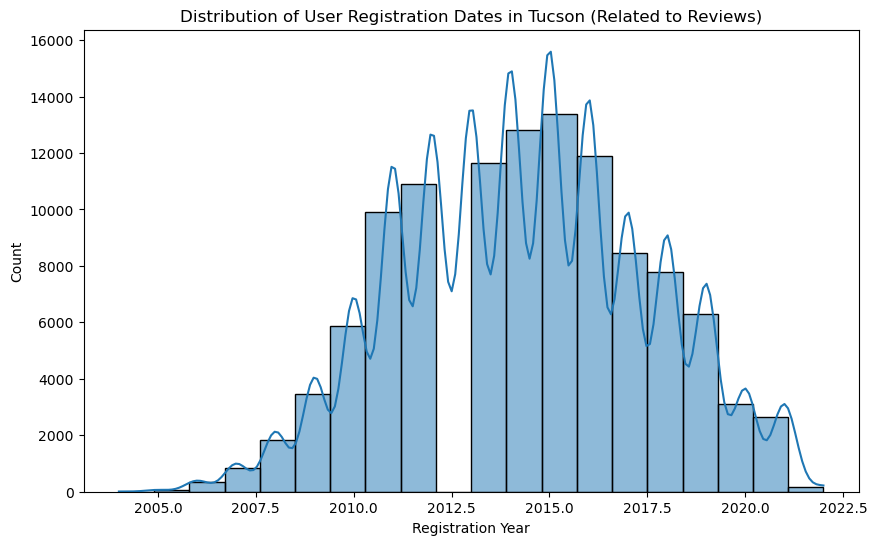

In [11]:
utils.UserRegistrationReviewsTucson(users, df_reviews_tucson)

/Users/luish/Desktop/Carreira/AcademicPath/Ensino Superior/Mestrados/DataScience&Engineering_FEUP/UnidadesCurriculares/2ndYear/1stSemester/AnalysisOfComplexData/project_repo/Recommendation-System---/utility_func.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_tucson_df.drop(columns=['is_open'], inplace=True)
/Users/luish/Desktop/Carreira/AcademicPath/Ensino Superior/Mestrados/DataScience&Engineering_FEUP/UnidadesCurriculares/2ndYear/1stSemester/AnalysisOfComplexData/project_repo/Recommendation-System---/utility_func.py:143: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_business = business_tucson_df.

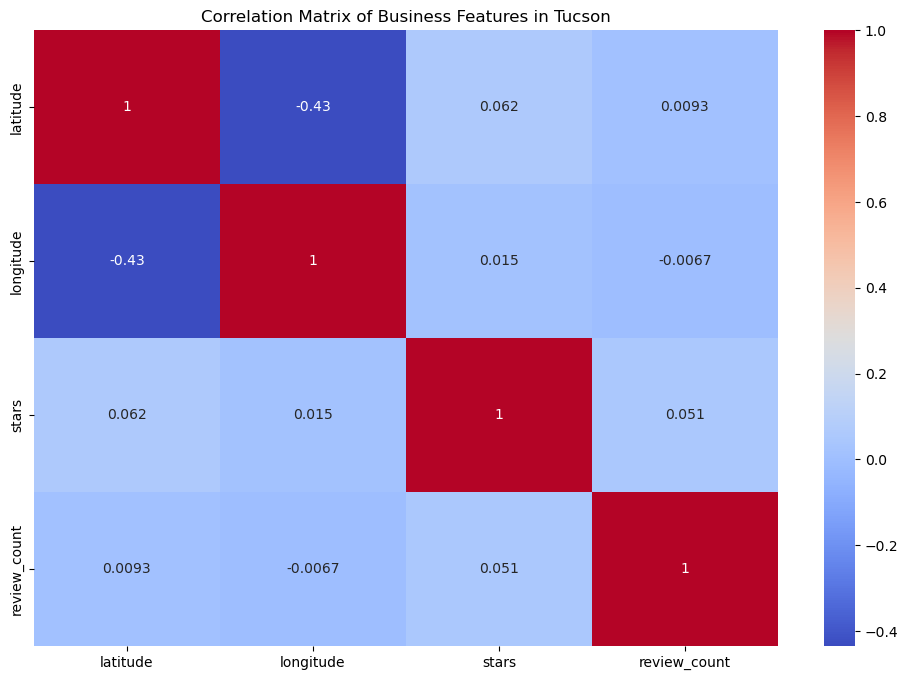

In [12]:
utils.CorrelationMatrix(df_business_open_tucson)

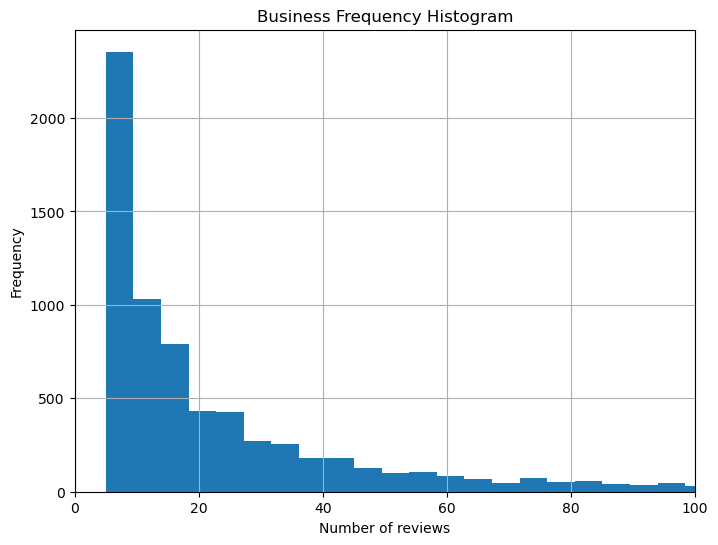

In [13]:
business_counts = utils.NumReviewsBusiness(df_reviews_tucson)